<a href="https://colab.research.google.com/github/Rajit13/My-Project-Works/blob/main/Astrobook_Diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Author: **[Fahim Rajit Hossain](https://rajit13.github.io/)**
### Research Fellow, CASSUM-VICO, BDLensing, Bangladesh team leader IOAA

In [ ]:
!sudo apt-get update
!sudo apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,665 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:14 https://deve

In [10]:
# Configure font and text settings
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 20
})

# START PLOTTING HERE

## Main Sequence Fitting Visualized
### Observational Astronomy

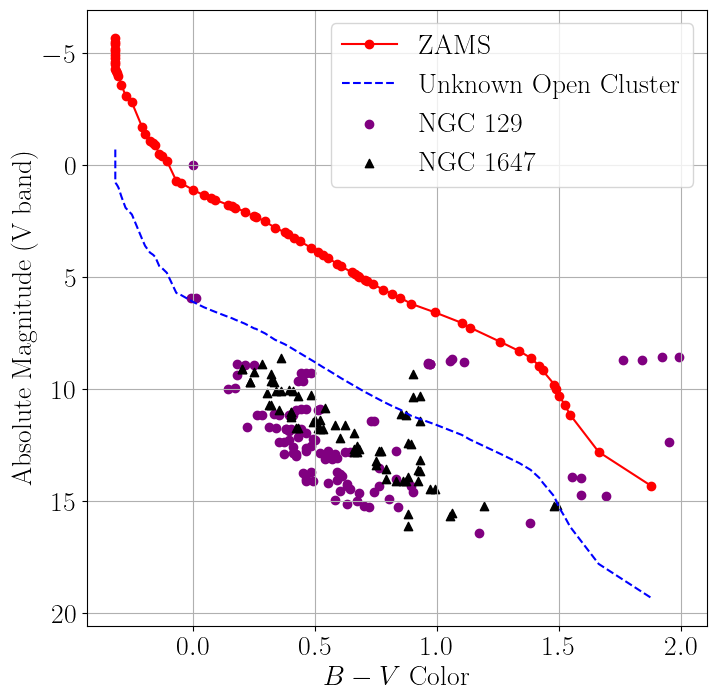

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Configure the plot size and resolution
mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['figure.dpi'] = 100

# File paths for NGC 129 and NGC 1647 data
ngc129_file = "/content/NGC129.txt"
ngc1647_file = "/content/NGC1647.txt"

# Load ZAMS data from the specified URL
zams_path = 'https://github.com/mahmud-nobe/AstronomicalData/raw/main/ZAMS.txt'
zams_data = pd.read_csv(zams_path, sep=' ')

# Load data for NGC 129 and NGC 1647
ngc129_data = np.genfromtxt(ngc129_file, delimiter=' ', comments='#')
ngc1647_data = np.genfromtxt(ngc1647_file, delimiter=' ', comments='#')

# Extract B-V and V values from files
ngc129_BV, ngc129_V = ngc129_data[:, 0], ngc129_data[:, 2]  # B-V is column 0, V is column 2
ngc1647_BV, ngc1647_V = ngc1647_data[:, 0], ngc1647_data[:, 2]  # B-V is column 0, V is column 2

# Create fake ZAMS by shifting the y-values of the actual ZAMS data
fake_M_zams = zams_data['Mv Absolute V magnitude'] + 5  # Shift by 5 magnitudes for visibility

# Plotting
fig, ax = plt.subplots()

# Plot ZAMS data
plt.plot(zams_data['B-V color'], zams_data['Mv Absolute V magnitude'], '-o', label='ZAMS', color='red')
plt.plot(zams_data['B-V color'], fake_M_zams, '--', label='Unknown Open Cluster', color='blue')  # Fake ZAMS

# Plot NGC 129 and NGC 1647 data
plt.scatter(ngc129_BV, ngc129_V, label="NGC 129", color='purple')
plt.scatter(ngc1647_BV, ngc1647_V, label="NGC 1647", marker='^', color='black')

# Adjust axes and labels
plt.ylabel('Absolute Magnitude (V band)')
plt.xlabel(r'$B-V$ Color')
plt.legend()
plt.gca().invert_yaxis()  # Invert the Y-axis for magnitude

# Show the plot
plt.grid(True)
plt.savefig('HR_MS_fitting.pdf', format='pdf')
plt.show()


## Abberration of Stars in Visualized
### Positional Astronomy

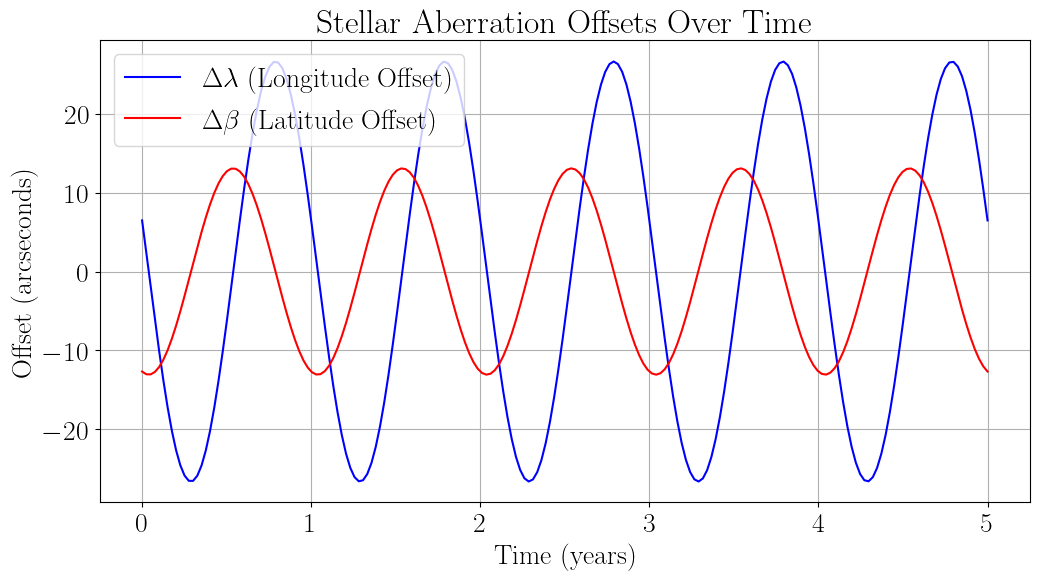

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
aberration_max = 20.5  # Maximum aberration in arcseconds

# Ecliptic coordinates of the star Sirius (in degrees)
star_lambda = 104.08  # Star's ecliptic longitude
star_beta = -39.61    # Star's ecliptic latitude

# Time parameters
years = np.linspace(0, 5, 200)  # 5-year period with 500 points
lambda_sun = (360 * years) % 360  # Sun's longitude cycles every year

# Convert angles to radians
lambda_sun_rad = np.radians(lambda_sun)
star_lambda_rad = np.radians(star_lambda)
star_beta_rad = np.radians(star_beta)

# Calculate longitudinal and latitudinal aberration offsets
delta_lambda = -aberration_max * np.cos(lambda_sun_rad - star_lambda_rad) / np.cos(star_beta_rad)
delta_beta = -aberration_max * np.sin(lambda_sun_rad - star_lambda_rad) * np.sin(star_beta_rad)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(years, delta_lambda, label=r'$\Delta \lambda$ (Longitude Offset)', color='blue')
plt.plot(years, delta_beta, label=r'$\Delta \beta$ (Latitude Offset)', color='red')
plt.xlabel('Time (years)')
plt.ylabel('Offset (arcseconds)')
plt.title('Stellar Aberration Offsets Over Time')
plt.legend()
plt.grid()
plt.show()


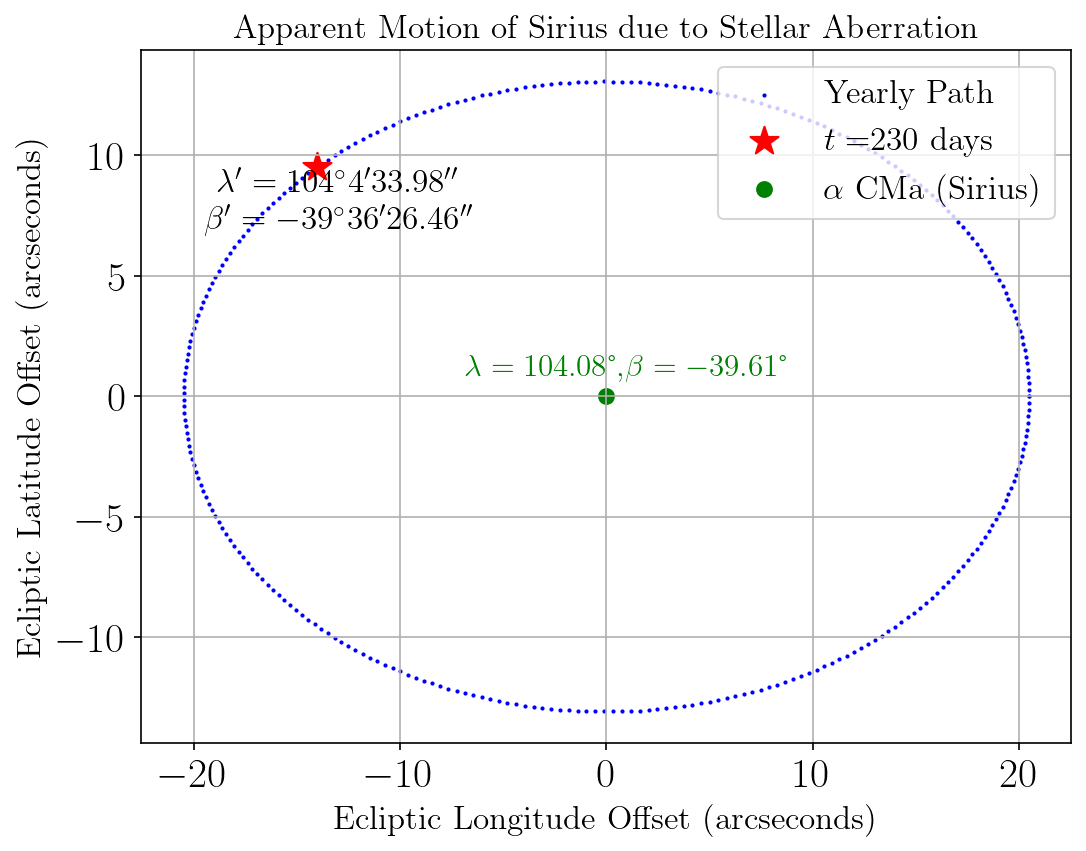

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
A = 20.5  # Aberration constant in arcseconds
years = 1  # Duration in years for initial plot
time_steps = 300  # Number of time steps

# Ecliptic coordinates of Sirius in degrees
star_lambda = 104.08  # Star's ecliptic longitude
star_beta = -39.61    # Star's ecliptic latitude

# Generate time array over one year
t = np.linspace(0, years, time_steps)  # Time in years

# Calculate the aberration offsets in arcseconds for the yearly path
lambda_offset_arcsec = A * np.cos(2 * np.pi * t)  # Adjusted to ensure max offset is A
beta_offset_arcsec = A * np.sin(2 * np.pi * t) * np.sin(np.radians(star_beta))  # Latitude adjustment

# Calculate the offsets at t days (t/365 years)
t_day = 230
t_200_days = t_day / 365  # Time in years
delta_lambda_200 = A * np.cos(2 * np.pi * t_200_days)  # Max offset A for t_day
delta_beta_200 = A * np.sin(2 * np.pi * t_200_days) * np.sin(np.radians(star_beta))  # Latitude adjustment

# Apparent position of Sirius after t days in degrees
lambda_prime = star_lambda + delta_lambda_200 / 3600  # Convert arcsec to degrees
beta_prime = star_beta + delta_beta_200 / 3600        # Convert arcsec to degrees

# Function to convert decimal degrees to degrees, minutes, seconds
def dms(degrees):
    d = int(degrees)
    m = int((abs(degrees) - abs(d)) * 60)  # Get absolute minutes
    s = (abs(degrees) - abs(d) - m / 60) * 3600  # Get absolute seconds
    return d, m, s

# Convert the apparent positions to degrees, minutes, and seconds
lambda_prime_deg, lambda_prime_min, lambda_prime_sec = dms(lambda_prime)
beta_prime_deg = int(beta_prime)  # Keep the integer degree value
beta_prime_abs_min, beta_prime_abs_sec = dms(abs(beta_prime))[1:3]  # Get absolute minutes and seconds

# Annotate the position with coordinates of lambda' and beta' after t days in X°Y'Z''
annotation_text = (
    r"$\lambda'={:.0f}^\circ {:.0f}' {:.2f}''$".format(lambda_prime_deg, lambda_prime_min, lambda_prime_sec) + "\n" +
    r"$\beta'={:.0f}^\circ {:.0f}' {:.2f}''$".format(beta_prime_deg, beta_prime_abs_min, beta_prime_abs_sec)
)

# Plot the yearly path of Sirius due to aberration using scatter
plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(lambda_offset_arcsec, beta_offset_arcsec, color='blue', s=1, label='Yearly Path')

# Mark the position after t days with a red star
plt.scatter(delta_lambda_200, delta_beta_200, marker='*', color='red', s=200, label=f'$t=${t_day} days')

# Annotate the position
plt.annotate(annotation_text, (delta_lambda_200, delta_beta_200),
             textcoords="offset points", xytext=(10, -30), ha='center', color='black', fontsize=16)

# Annotate the actual position of Sirius (α CMa) at the center
plt.scatter(0, 0, color='green', s=50, label=r'$\alpha$ CMa (Sirius)')
plt.annotate(r'$\lambda=104.08$°,$\beta=-39.61$°', (0, 0),
             textcoords="offset points", xytext=(10, 10), ha='center', color='green', fontsize=15)

# Labeling and grid
plt.xlabel(r'Ecliptic Longitude Offset (arcseconds)', fontsize=16)
plt.ylabel(r'Ecliptic Latitude Offset (arcseconds)', fontsize=16)
plt.title('Apparent Motion of Sirius due to Stellar Aberration', fontsize=16)

# Set limits to match the expected semi-major axis


# Place the legend in the upper right
plt.legend(loc='upper right', fontsize=16)
plt.grid(True)

# Save the figure as a PDF
plt.savefig('aberr_ellipse.pdf', format='pdf')
plt.show()


## Astronomical Filtrs
### Photometry

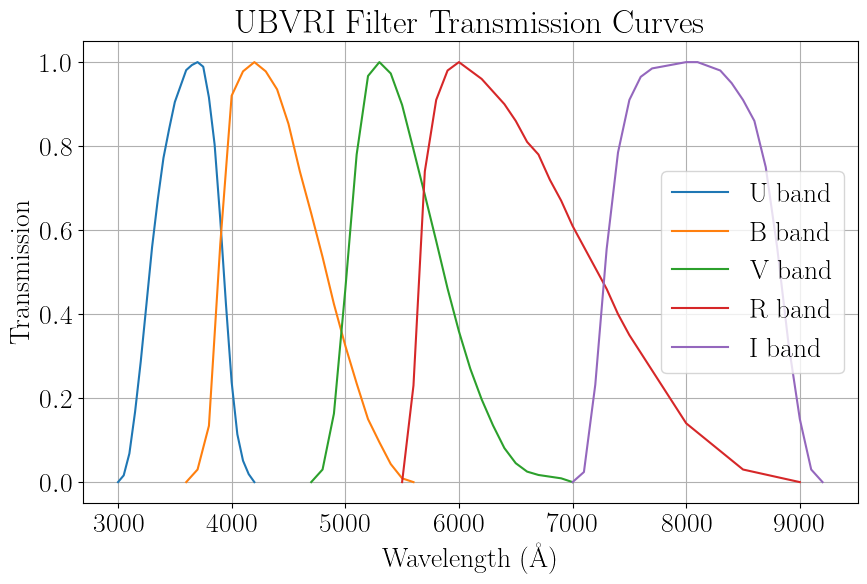

In [ ]:
import matplotlib.pyplot as plt

# Data for UBVRI filters
filters = {
    'U': {
        'wavelength': [3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200],
        'transmission': [0.00, 0.016, 0.068, 0.167, 0.287, 0.423, 0.560, 0.673, 0.772, 0.841, 0.905, 0.943, 0.981, 0.993, 1.000, 0.989, 0.916, 0.804, 0.625, 0.423, 0.238, 0.114, 0.051, 0.019, 0.000]
    },
    'B': {
        'wavelength': [3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600],
        'transmission': [0.0, 0.030, 0.134, 0.567, 0.920, 0.978, 1.000, 0.978, 0.935, 0.853, 0.740, 0.640, 0.536, 0.424, 0.325, 0.235, 0.150, 0.095, 0.043, 0.009, 0.0]
    },
    'V': {
        'wavelength': [4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000],
        'transmission': [0.000, 0.030, 0.163, 0.458, 0.780, 0.967, 1.000, 0.973, 0.898, 0.792, 0.684, 0.574, 0.461, 0.359, 0.270, 0.197, 0.135, 0.081, 0.045, 0.025, 0.017, 0.013, 0.009, 0.000]
    },
    'R': {
        'wavelength': [5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 8000, 8500, 9000],
        'transmission': [0.000, 0.23, 0.74, 0.91, 0.98, 1.000, 0.98, 0.96, 0.93, 0.90, 0.86, 0.81, 0.78, 0.72, 0.67, 0.61, 0.56, 0.51, 0.46, 0.40, 0.35, 0.14, 0.03, 0.00]
    },
    'I': {
        'wavelength': [7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200],
        'transmission': [0.000, 0.024, 0.232, 0.555, 0.785, 0.910, 0.965, 0.985, 0.990, 0.995, 1.000, 1.000, 0.990, 0.980, 0.950, 0.910, 0.860, 0.750, 0.560, 0.330, 0.150, 0.030, 0.000]
    }
}

# Plot the data
plt.figure(figsize=(10, 6))
for band, data in filters.items():
    plt.plot(data['wavelength'], data['transmission'], label=f'{band} band')

# Labeling the plot
plt.xlabel('Wavelength (Å)')
plt.ylabel('Transmission')
plt.title('UBVRI Filter Transmission Curves')
plt.legend()
plt.grid(True)
plt.show()


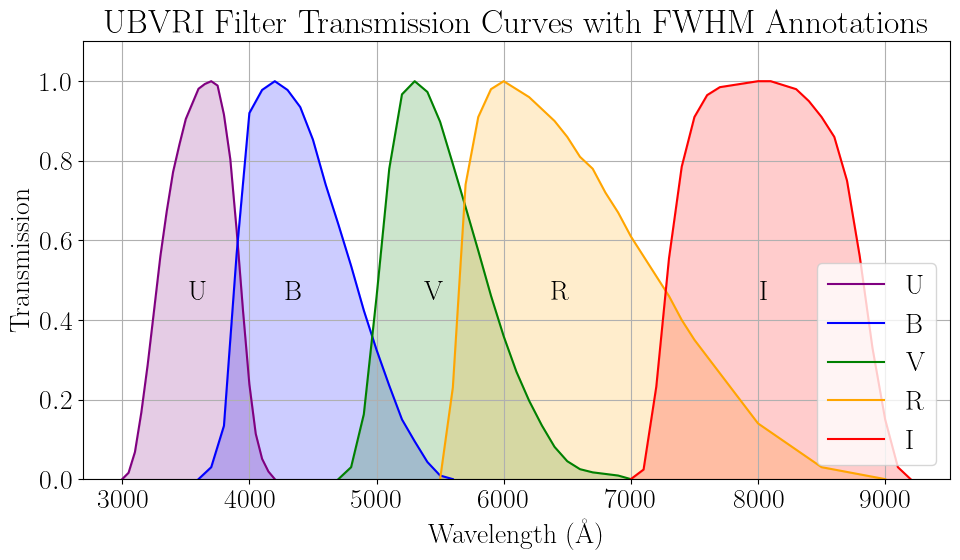

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Load UBVRI filter transmission data
u_wavelength = np.array([3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200])
u_transmission = np.array([0.00, 0.016, 0.068, 0.167, 0.287, 0.423, 0.560, 0.673, 0.772, 0.841, 0.905, 0.943, 0.981, 0.993, 1.000, 0.989, 0.916, 0.804, 0.625, 0.423, 0.238, 0.114, 0.051, 0.019, 0.000])

b_wavelength = np.array([3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600])
b_transmission = np.array([0.0, 0.030, 0.134, 0.567, 0.920, 0.978, 1.000, 0.978, 0.935, 0.853, 0.740, 0.640, 0.536, 0.424, 0.325, 0.235, 0.150, 0.095, 0.043, 0.009, 0.0])

v_wavelength = np.array([4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000])
v_transmission = np.array([0.000, 0.030, 0.163, 0.458, 0.780, 0.967, 1.000, 0.973, 0.898, 0.792, 0.684, 0.574, 0.461, 0.359, 0.270, 0.197, 0.135, 0.081, 0.045, 0.025, 0.017, 0.013, 0.009, 0.000])

r_wavelength = np.array([5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 8000, 8500, 9000])
r_transmission = np.array([0.000, 0.230, 0.740, 0.910, 0.980, 1.000, 0.980, 0.960, 0.930, 0.900, 0.860, 0.810, 0.780, 0.720, 0.670, 0.610, 0.560, 0.510, 0.460, 0.400, 0.350, 0.140, 0.030, 0.000])

i_wavelength = np.array([7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200])
i_transmission = np.array([0.000, 0.024, 0.232, 0.555, 0.785, 0.910, 0.965, 0.985, 0.990, 0.995, 1.000, 1.000, 0.990, 0.980, 0.950, 0.910, 0.860, 0.750, 0.560, 0.330, 0.150, 0.030, 0.000])

def calculate_fwhm(wavelength, transmission):
    max_transmission = np.max(transmission)
    half_max = max_transmission / 2.0
    indices_above_half_max = np.where(transmission >= half_max)[0]
    fwhm_wavelengths = wavelength[indices_above_half_max]
    return fwhm_wavelengths[0], fwhm_wavelengths[-1]

# Plot each transmission curve and annotate at FWHM
fig, ax = plt.subplots(figsize=(10, 6))

for wavelength, transmission, label, color in zip(
    [u_wavelength, b_wavelength, v_wavelength, r_wavelength, i_wavelength],
    [u_transmission, b_transmission, v_transmission, r_transmission, i_transmission],
    ['U', 'B', 'V', 'R', 'I'],
    ['purple', 'blue', 'green', 'orange', 'red']
):
    ax.plot(wavelength, transmission, label=label, color=color)
    ax.fill_between(wavelength, transmission, color=color, alpha=0.2)

    # Calculate FWHM
    fwhm_start, fwhm_end = calculate_fwhm(wavelength, transmission)
    fwhm_center = (fwhm_start + fwhm_end) / 2
    half_max = np.max(transmission) / 2.0

    # Annotate the filter name at FWHM without a line
    ax.text(fwhm_center, half_max - 0.05, label, ha='center', color='black', fontsize=20, fontweight='bold')

# Configure plot
ax.set_xlabel('Wavelength (Å)')
ax.set_ylabel('Transmission')
ax.set_ylim(0, 1.1)
ax.set_title('UBVRI Filter Transmission Curves with FWHM Annotations')
ax.grid()
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


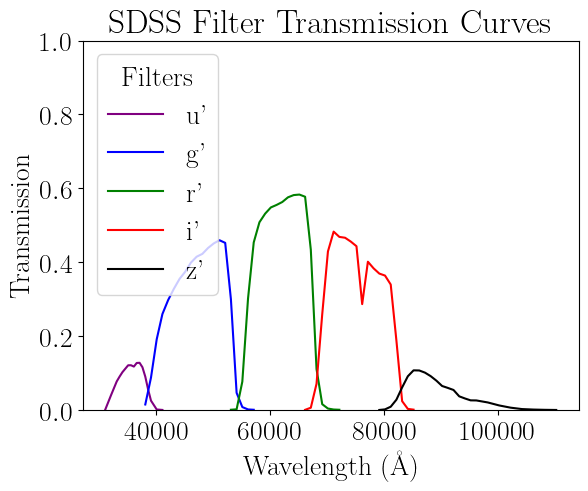

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load filter transmission data from files
u_transmission = np.loadtxt('/content/u_SDSS.res', skiprows=1, usecols=1)
g_transmission = np.loadtxt('/content/g_SDSS.res', skiprows=1, usecols=1)
r_transmission = np.loadtxt('/content/r_SDSS.res', skiprows=1, usecols=1)
i_transmission = np.loadtxt('/content/i_SDSS.res', skiprows=1, usecols=1)
z_transmission = np.loadtxt('/content/z_SDSS.res', skiprows=1, usecols=1)

# Load filter wavelength data from files
u_wavelength = np.loadtxt('/content/u_SDSS.res', skiprows=1, usecols=0) * 10  # Convert to Å
g_wavelength = np.loadtxt('/content/g_SDSS.res', skiprows=1, usecols=0) * 10  # Convert to Å
r_wavelength = np.loadtxt('/content/r_SDSS.res', skiprows=1, usecols=0) * 10  # Convert to Å
i_wavelength = np.loadtxt('/content/i_SDSS.res', skiprows=1, usecols=0) * 10  # Convert to Å
z_wavelength = np.loadtxt('/content/z_SDSS.res', skiprows=1, usecols=0) * 10  # Convert to Å

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot transmission curves
ax.plot(u_wavelength, u_transmission, label='u\'', color='purple')
ax.plot(g_wavelength, g_transmission, label='g\'', color='blue')
ax.plot(r_wavelength, r_transmission, label='r\'', color='green')
ax.plot(i_wavelength, i_transmission, label='i\'', color='red')
ax.plot(z_wavelength, z_transmission, label='z\'', color='black')

# Set axis labels and limits
ax.set_xlabel('Wavelength (Å)')  # Updated label to Å
ax.set_ylabel('Transmission')
ax.set_ylim(0, 1)

# Add legend and title
ax.legend(title='Filters', loc='upper left')
ax.set_title('SDSS Filter Transmission Curves')

# Show plot
plt.show()


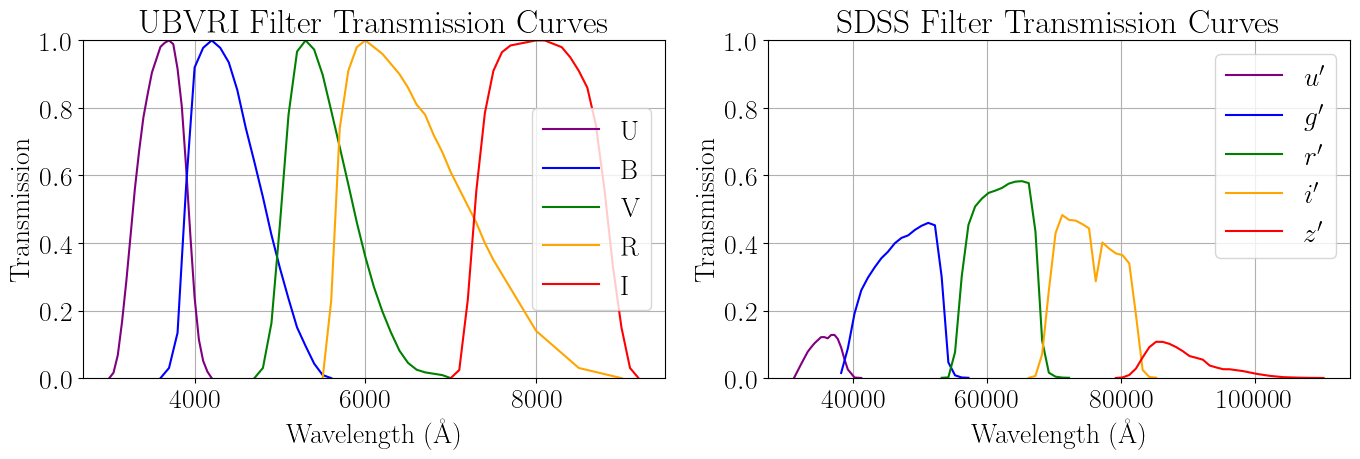

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load UBVRI filter transmission data
# Assuming you have the data in the same format as previously provided
u_wavelength = np.array([3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200])
u_transmission = np.array([0.00, 0.016, 0.068, 0.167, 0.287, 0.423, 0.560, 0.673, 0.772, 0.841, 0.905, 0.943, 0.981, 0.993, 1.000, 0.989, 0.916, 0.804, 0.625, 0.423, 0.238, 0.114, 0.051, 0.019, 0.000])

b_wavelength = np.array([3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600])
b_transmission = np.array([0.0, 0.030, 0.134, 0.567, 0.920, 0.978, 1.000, 0.978, 0.935, 0.853, 0.740, 0.640, 0.536, 0.424, 0.325, 0.235, 0.150, 0.095, 0.043, 0.009, 0.0])

v_wavelength = np.array([4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000])
v_transmission = np.array([0.000, 0.030, 0.163, 0.458, 0.780, 0.967, 1.000, 0.973, 0.898, 0.792, 0.684, 0.574, 0.461, 0.359, 0.270, 0.197, 0.135, 0.081, 0.045, 0.025, 0.017, 0.013, 0.009, 0.000])

r_wavelength = np.array([5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 8000, 8500, 9000])
r_transmission = np.array([0.000, 0.230, 0.740, 0.910, 0.980, 1.000, 0.980, 0.960, 0.930, 0.900, 0.860, 0.810, 0.780, 0.720, 0.670, 0.610, 0.560, 0.510, 0.460, 0.400, 0.350, 0.140, 0.030, 0.000])

i_wavelength = np.array([7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200])
i_transmission = np.array([0.000, 0.024, 0.232, 0.555, 0.785, 0.910, 0.965, 0.985, 0.990, 0.995, 1.000, 1.000, 0.990, 0.980, 0.950, 0.910, 0.860, 0.750, 0.560, 0.330, 0.150, 0.030, 0.000])

# Load SDSS filter transmission data
u_sdss_transmission = np.loadtxt('/content/u_SDSS.res', skiprows=1, usecols=1)
g_sdss_transmission = np.loadtxt('/content/g_SDSS.res', skiprows=1, usecols=1)
r_sdss_transmission = np.loadtxt('/content/r_SDSS.res', skiprows=1, usecols=1)
i_sdss_transmission = np.loadtxt('/content/i_SDSS.res', skiprows=1, usecols=1)
z_sdss_transmission = np.loadtxt('/content/z_SDSS.res', skiprows=1, usecols=1)

u_sdss_wavelength = np.loadtxt('/content/u_SDSS.res', skiprows=1, usecols=0) * 10  # Convert to Å
g_sdss_wavelength = np.loadtxt('/content/g_SDSS.res', skiprows=1, usecols=0) * 10  # Convert to Å
r_sdss_wavelength = np.loadtxt('/content/r_SDSS.res', skiprows=1, usecols=0) * 10  # Convert to Å
i_sdss_wavelength = np.loadtxt('/content/i_SDSS.res', skiprows=1, usecols=0) * 10  # Convert to Å
z_sdss_wavelength = np.loadtxt('/content/z_SDSS.res', skiprows=1, usecols=0) * 10  # Convert to Å

# Create a figure and axis objects for side by side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot UBVRI filter transmission curves
ax1.plot(u_wavelength, u_transmission, label='U', color='purple')
ax1.plot(b_wavelength, b_transmission, label='B', color='blue')
ax1.plot(v_wavelength, v_transmission, label='V', color='green')
ax1.plot(r_wavelength, r_transmission, label='R', color='orange')
ax1.plot(i_wavelength, i_transmission, label='I', color='red')

# Set axis labels and title for UBVRI plot
ax1.set_xlabel('Wavelength (Å)')
ax1.set_ylabel('Transmission')
ax1.set_ylim(0, 1)
ax1.set_title('UBVRI Filter Transmission Curves')
ax1.legend()
ax1.grid()

# Plot SDSS filter transmission curves
ax2.plot(u_sdss_wavelength, u_sdss_transmission, label='$u\'$', color='purple')
ax2.plot(g_sdss_wavelength, g_sdss_transmission, label='$g\'$', color='blue')
ax2.plot(r_sdss_wavelength, r_sdss_transmission, label='$r\'$', color='green')
ax2.plot(i_sdss_wavelength, i_sdss_transmission, label='$i\'$', color='orange')
ax2.plot(z_sdss_wavelength, z_sdss_transmission, label='$z\'$', color='red')

# Set axis labels and title for SDSS plot
ax2.set_xlabel('Wavelength (Å)')
ax2.set_ylabel('Transmission')
ax2.set_ylim(0, 1)
ax2.set_title('SDSS Filter Transmission Curves')
ax2.legend()
ax2.grid()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()


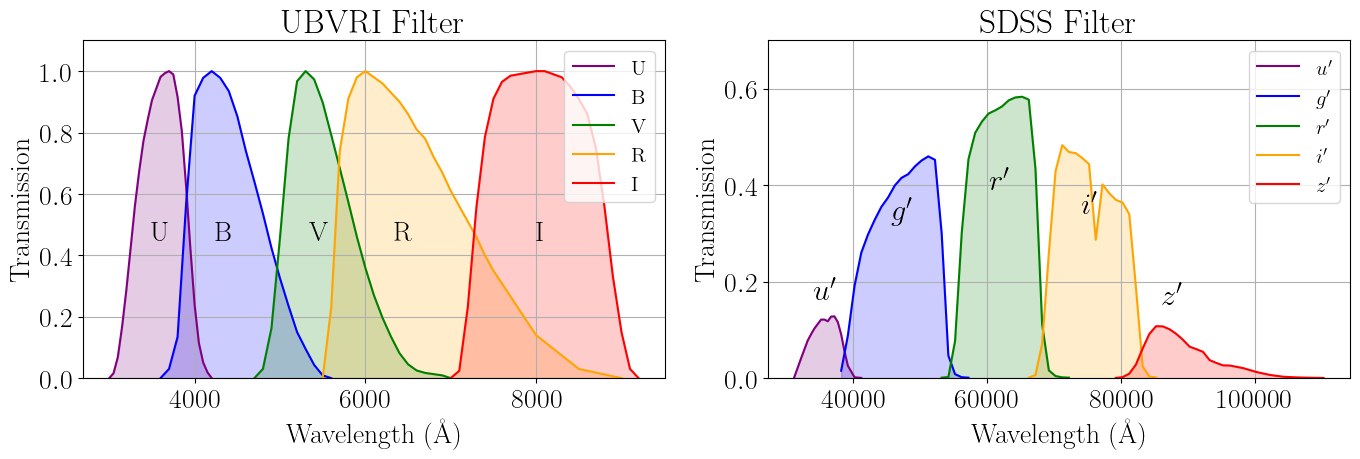

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Load UBVRI filter transmission data
u_wavelength = np.array([3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200])
u_transmission = np.array([0.00, 0.016, 0.068, 0.167, 0.287, 0.423, 0.560, 0.673, 0.772, 0.841, 0.905, 0.943, 0.981, 0.993, 1.000, 0.989, 0.916, 0.804, 0.625, 0.423, 0.238, 0.114, 0.051, 0.019, 0.000])

b_wavelength = np.array([3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600])
b_transmission = np.array([0.0, 0.030, 0.134, 0.567, 0.920, 0.978, 1.000, 0.978, 0.935, 0.853, 0.740, 0.640, 0.536, 0.424, 0.325, 0.235, 0.150, 0.095, 0.043, 0.009, 0.0])

v_wavelength = np.array([4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000])
v_transmission = np.array([0.000, 0.030, 0.163, 0.458, 0.780, 0.967, 1.000, 0.973, 0.898, 0.792, 0.684, 0.574, 0.461, 0.359, 0.270, 0.197, 0.135, 0.081, 0.045, 0.025, 0.017, 0.013, 0.009, 0.000])

r_wavelength = np.array([5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 8000, 8500, 9000])
r_transmission = np.array([0.000, 0.230, 0.740, 0.910, 0.980, 1.000, 0.980, 0.960, 0.930, 0.900, 0.860, 0.810, 0.780, 0.720, 0.670, 0.610, 0.560, 0.510, 0.460, 0.400, 0.350, 0.140, 0.030, 0.000])

i_wavelength = np.array([7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200])
i_transmission = np.array([0.000, 0.024, 0.232, 0.555, 0.785, 0.910, 0.965, 0.985, 0.990, 0.995, 1.000, 1.000, 0.990, 0.980, 0.950, 0.910, 0.860, 0.750, 0.560, 0.330, 0.150, 0.030, 0.000])

# Load SDSS filter transmission data
u_sdss_transmission = np.loadtxt('/content/u_SDSS.res', skiprows=1, usecols=1)
g_sdss_transmission = np.loadtxt('/content/g_SDSS.res', skiprows=1, usecols=1)
r_sdss_transmission = np.loadtxt('/content/r_SDSS.res', skiprows=1, usecols=1)
i_sdss_transmission = np.loadtxt('/content/i_SDSS.res', skiprows=1, usecols=1)
z_sdss_transmission = np.loadtxt('/content/z_SDSS.res', skiprows=1, usecols=1)

u_sdss_wavelength = np.loadtxt('/content/u_SDSS.res', skiprows=1, usecols=0) * 10  # Convert to Å
g_sdss_wavelength = np.loadtxt('/content/g_SDSS.res', skiprows=1, usecols=0) * 10  # Convert to Å
r_sdss_wavelength = np.loadtxt('/content/r_SDSS.res', skiprows=1, usecols=0) * 10  # Convert to Å
i_sdss_wavelength = np.loadtxt('/content/i_SDSS.res', skiprows=1, usecols=0) * 10  # Convert to Å
z_sdss_wavelength = np.loadtxt('/content/z_SDSS.res', skiprows=1, usecols=0) * 10  # Convert to Å

def calculate_fwhm(wavelength, transmission):
    max_transmission = np.max(transmission)
    half_max = max_transmission / 2.0
    indices_above_half_max = np.where(transmission >= half_max)[0]
    fwhm_wavelengths = wavelength[indices_above_half_max]
    return fwhm_wavelengths[0], fwhm_wavelengths[-1]

# Create a figure and axis objects for side by side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot and fill the UBVRI filter transmission curves
for wavelength, transmission, label, color in zip(
    [u_wavelength, b_wavelength, v_wavelength, r_wavelength, i_wavelength],
    [u_transmission, b_transmission, v_transmission, r_transmission, i_transmission],
    ['U', 'B', 'V', 'R', 'I'],
    ['purple', 'blue', 'green', 'orange', 'red']
):
    ax1.plot(wavelength, transmission, label=label, color=color)
    ax1.fill_between(wavelength, transmission, color=color, alpha=0.2)

    # Calculate FWHM
    fwhm_start, fwhm_end = calculate_fwhm(wavelength, transmission)
    fwhm_center = (fwhm_start + fwhm_end) / 2
    half_max = np.max(transmission) / 2.0

    # Annotate the filter name at FWHM without a line
    ax1.text(fwhm_center, half_max - 0.05, label, ha='center', color='black', fontsize=20, fontweight='bold')

# Set axis labels and title for UBVRI plot
ax1.set_xlabel('Wavelength (Å)')
ax1.set_ylabel('Transmission')
ax1.set_ylim(0, 1.1)
ax1.set_title('UBVRI Filter')
ax1.legend(loc='upper right', fontsize=15)
ax1.grid()

# Plot and fill the SDSS filter transmission curves
for wavelength, transmission, label, color in zip(
    [u_sdss_wavelength, g_sdss_wavelength, r_sdss_wavelength, i_sdss_wavelength, z_sdss_wavelength],
    [u_sdss_transmission, g_sdss_transmission, r_sdss_transmission, i_sdss_transmission, z_sdss_transmission],
    ['$u\'$', '$g\'$', '$r\'$', '$i\'$', '$z\'$'],
    ['purple', 'blue', 'green', 'orange', 'red']
):
    ax2.plot(wavelength, transmission, label=label, color=color)
    ax2.fill_between(wavelength, transmission, color=color, alpha=0.2)

    # Calculate FWHM
    fwhm_start, fwhm_end = calculate_fwhm(wavelength, transmission)
    fwhm_center = (fwhm_start + fwhm_end) / 2
    half_max = np.max(transmission) / 2.0

    # Annotate the filter name at FWHM without a line
    ax2.text(fwhm_center, half_max + 0.1, label, ha='center', color='black', fontsize=22, fontweight='bold')

# Set axis labels and title for SDSS plot
ax2.set_xlabel('Wavelength (Å)')
ax2.set_ylabel('Transmission')
ax2.set_ylim(0, 0.7)
ax2.set_title('SDSS Filter')
ax2.legend(fontsize=15)
ax2.grid()

# Adjust layout to avoid overlap
plt.tight_layout()

# Save plot to PDF
plt.savefig('sdss_ubv.pdf', format='pdf')

# Show plot
plt.show()


## Astronomical Imaging and Analysis
### Photometry

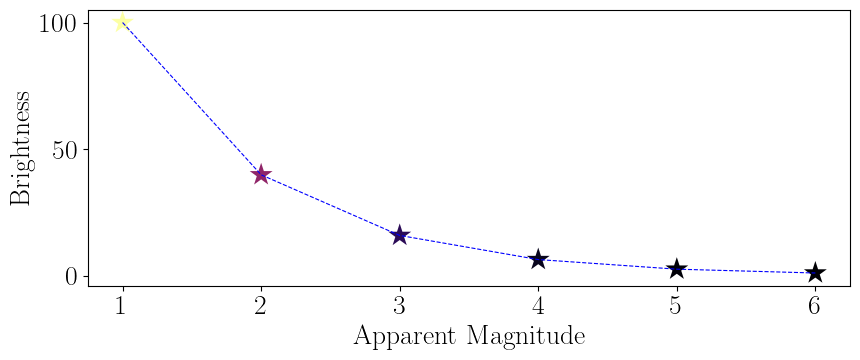

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define magnitudes (1 to 6) and reference brightness B_1 for magnitude 1
magnitudes = np.arange(1, 7)
B_ref = 100  # Assume B_1 = 100 for the reference brightness of magnitude 1

# Calculate brightness for each magnitude using Pogson's equation
brightness = B_ref * 10**(-0.4 * (magnitudes - 1))  # B_2 at different magnitudes

# Normalize brightness for color mapping
normalized_brightness = brightness / np.max(brightness)

# Create a figure
fig, ax = plt.subplots(figsize=(9, 4))

# Scatter plot with star markers, using brightness as color
sc = ax.scatter(magnitudes, brightness,
                s=300,  # Size of stars
                c=normalized_brightness,
                cmap='inferno',
                edgecolor='none',
                marker='*')  # Star shape marker

# Connect stars with a line to show brightness trend
ax.plot(magnitudes, brightness, color='blue', linewidth=0.8, linestyle='--')

# Remove the log scale from the y-axis
# ax.set_yscale('log')  # This line is removed

# Set axis labels
ax.set_xlabel('Apparent Magnitude')
ax.set_ylabel('Brightness')
ax.set_xticks(magnitudes)

# Title and layout adjustments
#ax.set_title("Brightness of Stars by Magnitude", fontsize=18)
plt.tight_layout()

# Display the plot
plt.savefig('magb00.pdf', format='pdf')
plt.show()


0.004578544
0.0012347769
(875, 875)


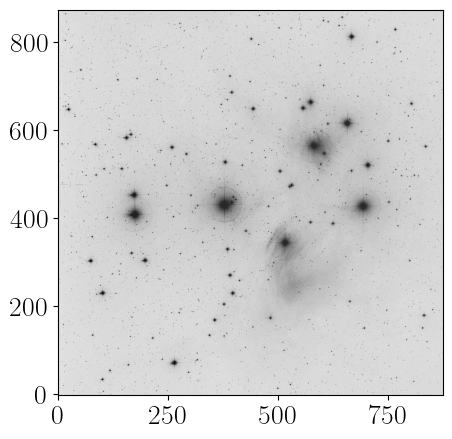

In [ ]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt

image = fits.getdata('pleiades.fits')

# image is just a numpy array
print(image.mean())
print(image.std())
print(image.shape)

# Use plt.subplots to create the figure and axis
fig, axis = plt.subplots(figsize=(5, 5))  # This creates a figure and an axis

implot = axis.imshow(image, cmap=plt.get_cmap('Greys'), origin='lower')
axis.grid(False)
plt.savefig('pleiades_img.pdf', format='pdf')
plt.show()

In [ ]:
from astropy.io import fits

# Open the FITS file
with fits.open('pleiades.fits') as hdul:
    # Access the header of the primary HDU (Header/Data Unit)
    header = hdul[0].header

    # Print BSCALE and other relevant scaling keywords
    print("BSCALE:", header.get('BSCALE', 'Not found'))
    print("BZERO:", header.get('BZERO', 'Not found'))

    # If you want to see the entire header, you can print it as well
    print("\nFull Header:")
    print(repr(header))


BSCALE: 0.0001526
BZERO: 0.0

Full Header:
SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  875 / length of data axis 1                          
NAXIS2  =                  875 / length of data axis 2                          
BZERO   =                   0. / PhysValue = BZERO + BSCALE * ArrayValue        
BSCALE  =            0.0001526 / PhysValue = BZERO + BSCALE * ArrayValue        
COMMENT Standard WCS reduction:                                                 
CRVAL1  =     56.7489909930614 / WCS Ref value (RA in decimal degrees)          
CRVAL2  =     24.1176620538817 / WCS Ref value (DEC in decimal degrees)         
CRPIX1  =                437.5 / WCS Coordinate reference pixel                 
CRPIX2  =                437.5 / WCS Coordinate reference pixel   

In [ ]:
import numpy as np
from astropy.io import fits

# Load the image data
with fits.open('pleiades.fits') as hdul:
    image_data = hdul[0].data

# Convert back to ADU by dividing by BSCALE
bscale = 0.0001526
original_adu = image_data / bscale


Mean ADU: 0.004578544
Standard deviation of ADU: 0.0012347769
Image shape (rows, columns): (875, 875)


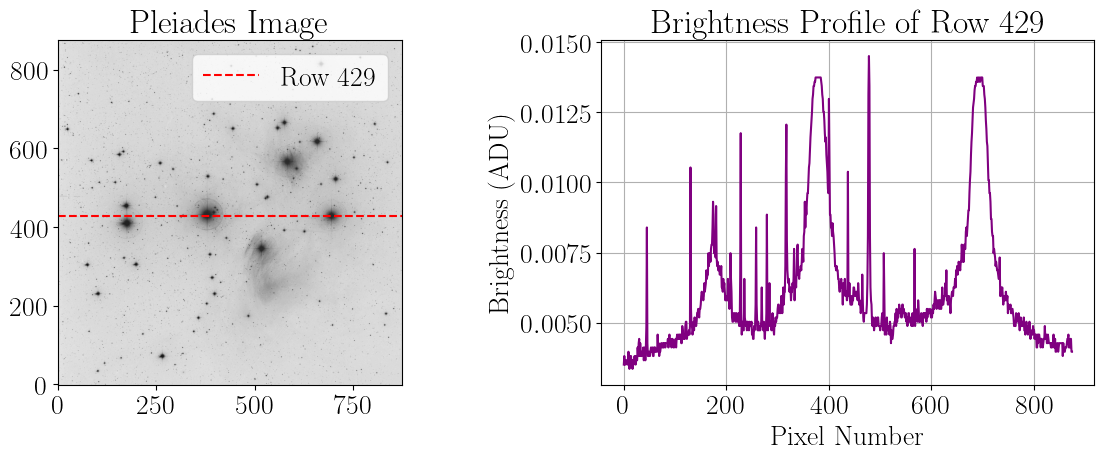

In [ ]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np

# Load the FITS image data
image = fits.getdata('pleiades.fits')

# Print mean and standard deviation of the image
print("Mean ADU:", image.mean())
print("Standard deviation of ADU:", image.std())
print("Image shape (rows, columns):", image.shape)

# Find the row with the highest total brightness
brightest_row_index = np.argmax(image.mean(axis=1))

# Extract the brightness values along this row
brightest_row_data = image[brightest_row_index]

# Create a figure with two side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Display the original image with a line marking the brightest row
implot = ax1.imshow(image, cmap=plt.get_cmap('Greys'), origin='lower')
ax1.axhline(y=brightest_row_index, color='red', linestyle='--', linewidth=1.5, label=f'Row {brightest_row_index}')
ax1.set_title('Pleiades Image')
ax1.grid(False)
ax1.legend()

# Plot the brightness profile of the brightest row
ax2.plot(brightest_row_data, color='purple')
ax2.set_xlabel('Pixel Number')
ax2.set_ylabel('Brightness (ADU)')
ax2.set_title(f'Brightness Profile of Row {brightest_row_index}')
ax2.grid()

# Show the combined figure with both plots
plt.tight_layout()
plt.show()


Mean ADU: 30.003561
Standard deviation of ADU: 8.091593
Image shape (rows, columns): (875, 875)


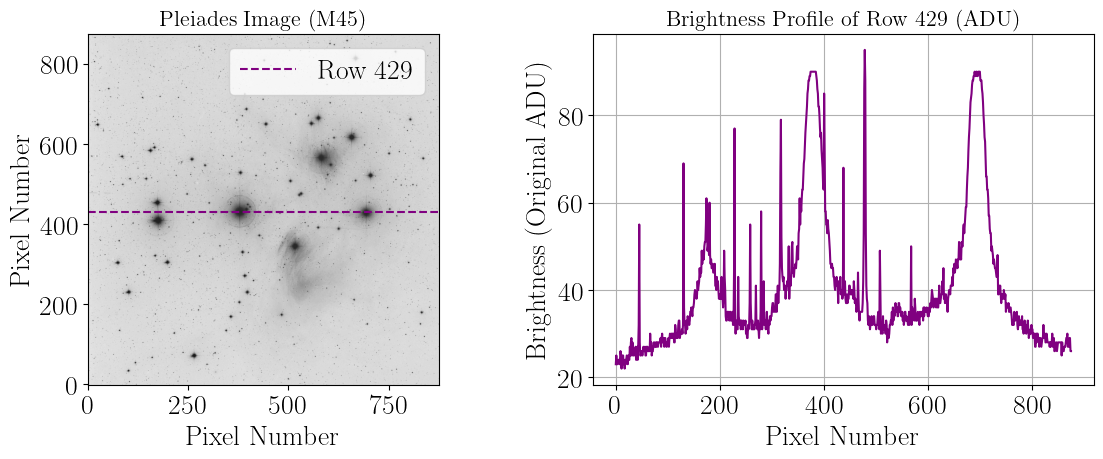

In [ ]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np

# Load the FITS image data
image = fits.getdata('pleiades.fits')

# Scaling factor (from the header of the FITS file)
bscale = 0.0001526

# Convert the image data to original ADU values
original_adu_image = image / bscale

# Print mean and standard deviation of the original ADU image
print("Mean ADU:", original_adu_image.mean())
print("Standard deviation of ADU:", original_adu_image.std())
print("Image shape (rows, columns):", original_adu_image.shape)

# Find the row with the highest total brightness in original ADU values
brightest_row_index = np.argmax(original_adu_image.mean(axis=1))

# Extract the brightness values along this row in ADU
brightest_row_data = original_adu_image[brightest_row_index]

# Create a figure with two side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Display the original ADU image with a line marking the brightest row
implot = ax1.imshow(original_adu_image, cmap=plt.get_cmap('Greys'), origin='lower')
ax1.axhline(y=brightest_row_index, color='purple', linestyle='--', linewidth=1.5, label=f'Row {brightest_row_index}')
ax1.set_xlabel('Pixel Number')
ax1.set_ylabel('Pixel Number')
ax1.set_title('Pleiades Image (M45)', fontsize=16)
ax1.grid(False)
ax1.legend()

# Plot the brightness profile of the brightest row in ADU
ax2.plot(brightest_row_data, color='purple')
ax2.set_xlabel('Pixel Number')
ax2.set_ylabel('Brightness (Original ADU)')
ax2.set_title(f'Brightness Profile of Row {brightest_row_index} (ADU)', fontsize=16)
ax2.grid()

# Show the combined figure with both plots
plt.tight_layout()
plt.savefig('ADU.pdf', format='pdf')
plt.show()


## Habitable Zone Visualized
### Radiation Mechanics

In [ ]:
import numpy as np

# Constants
L_solar = 3.828e26  # Solar luminosity in Watts
A = 0.3  # Earth's average albedo
sigma = 5.67e-8  # Stefan-Boltzmann constant in W/m^2/K^4

# Temperatures in Kelvin
T_min = 273  # Lower temperature bound for habitable zone (D_max)
T_max = 373  # Upper temperature bound for habitable zone (D_min)

# Calculate D_max and D_min in meters for 1 solar luminosity
D_max = np.sqrt((L_solar * (1 - A)) / (16 * np.pi * sigma * T_min**4))
D_min = np.sqrt((L_solar * (1 - A)) / (16 * np.pi * sigma * T_max**4))

# Convert distances to astronomical units (1 AU = 1.496e11 meters)
D_max_AU = D_max / 1.496e11
D_min_AU = D_min / 1.496e11

D_max, D_min, D_max_AU, D_min_AU


(130101778475.9753, 69693273494.64139, 0.8696642946255033, 0.4658641276379772)

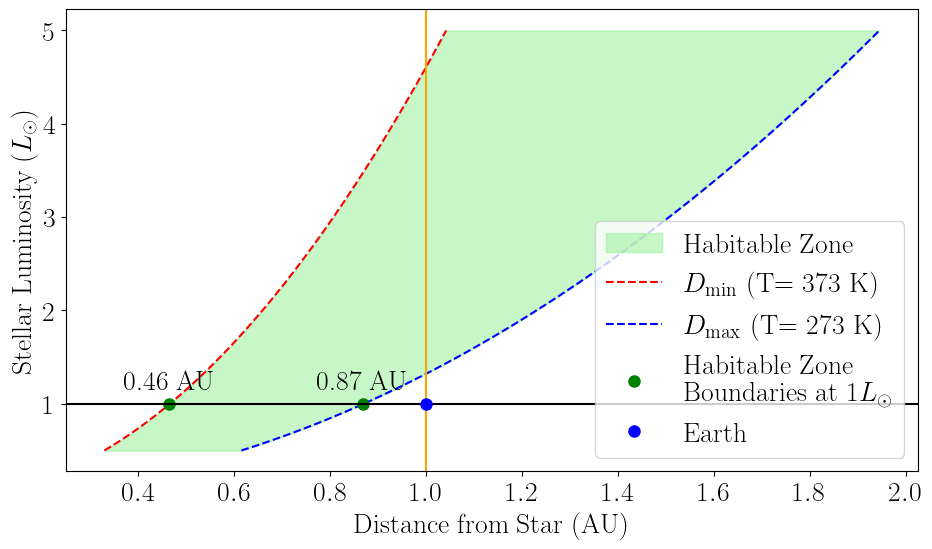

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
A = 0.3  # Earth's average albedo
sigma = 5.67e-8  # Stefan-Boltzmann constant in W/m^2/K^4
L_sun = 3.828e26  # Solar luminosity in Watts

# Define the range for stellar luminosity in units of Watts
L_range = np.linspace(0.5, 5, 500) * L_sun

# Define temperatures for habitable zone boundaries
T_min = 273  # K, lower boundary temperature (for D_max)
T_max = 373  # K, upper boundary temperature (for D_min)

# Calculate distances for D_min and D_max as a function of stellar luminosity
D_min = np.sqrt((L_range * (1 - A)) / (16 * np.pi * sigma * T_max**4)) / 1.496e11  # Convert to AU
D_max = np.sqrt((L_range * (1 - A)) / (16 * np.pi * sigma * T_min**4)) / 1.496e11  # Convert to AU

# Find the values of D_min and D_max at 1 solar luminosity
L_index = np.argmin(np.abs(L_range / L_sun - 1))  # Find index closest to 1 L_sun
D_min_at_L_sun = D_min[L_index]
D_max_at_L_sun = D_max[L_index]

# Plotting
plt.figure(figsize=(11, 6))

# Shading the habitable zone between D_min and D_max
plt.fill_betweenx(L_range / L_sun, D_min, D_max, color='lightgreen', alpha=0.5, label='Habitable Zone')
plt.plot(D_min, L_range / L_sun, color='red', linestyle='--', label=r'$D_{\rm min}$ (T= 373 K)')
plt.plot(D_max, L_range / L_sun, color='blue', linestyle='--', label=r'$D_{\rm max}$ (T= 273 K)')

# Mark the points where the habitable zone intersects 1 solar luminosity
plt.plot([D_min_at_L_sun, D_max_at_L_sun], [1, 1], 'go', markersize=8, label='Habitable Zone \n Boundaries at $1 L_\odot$')
plt.text(D_min_at_L_sun, 1.15, f"{D_min_at_L_sun:.2f} AU", ha='center', color='black')
plt.text(D_max_at_L_sun, 1.15, f"{D_max_at_L_sun:.2f} AU", ha='center', color='black')

# Add a line for Earth's orbit at 1 AU
plt.axvline(x=1, color='orange', linestyle='-', linewidth=1.5) #, label="Earth's Orbit"

# Add a horizontal line at 1 solar luminosity
plt.axhline(y=1, color='black', linestyle='-', linewidth=1.5) #, label="Solar Luminosity

# Mark Earth's position on the plot
plt.plot(1, 1, 'bo', markersize=8, label="Earth")

# Axis labels and title
plt.xlabel('Distance from Star (AU)')
plt.ylabel('Stellar Luminosity ($L_\odot$)')
#plt.title('Habitable Zone as a Function of Stellar Luminosity')
plt.legend()
plt.grid(False)
plt.savefig('HZ.pdf', format='pdf')
plt.show()


## Radiation Drag of Dust Grains
### Radiation Mechanics

In [ ]:
import numpy as np

# Constants in given units
L_sun = 3.828e26  # Solar luminosity in Watts
c = 3.0e8  # Speed of light in m/s
G = 6.67430e-11  # Gravitational constant in m^3/kg/s^2
M_sun = 1.989e30  # Solar mass in kg
R = 10e-6  # Radius of dust grain in meters (10 micrometers)
rho = 2.5 * 1e3  # Density of dust grain in kg/m^3 (converted from g/cm^3 to kg/m^3)

# Calculate beta using updated density (rho in kg/m^3)
beta = (3 * L_sun) / (16 * np.pi * c * G * M_sun * R * rho)
print("Beta:", beta)


Beta: 0.02294676977047462


Beta: 0.06374102714020727
Time for the dust grain to fall into the Sun: 134815.26963053926 years


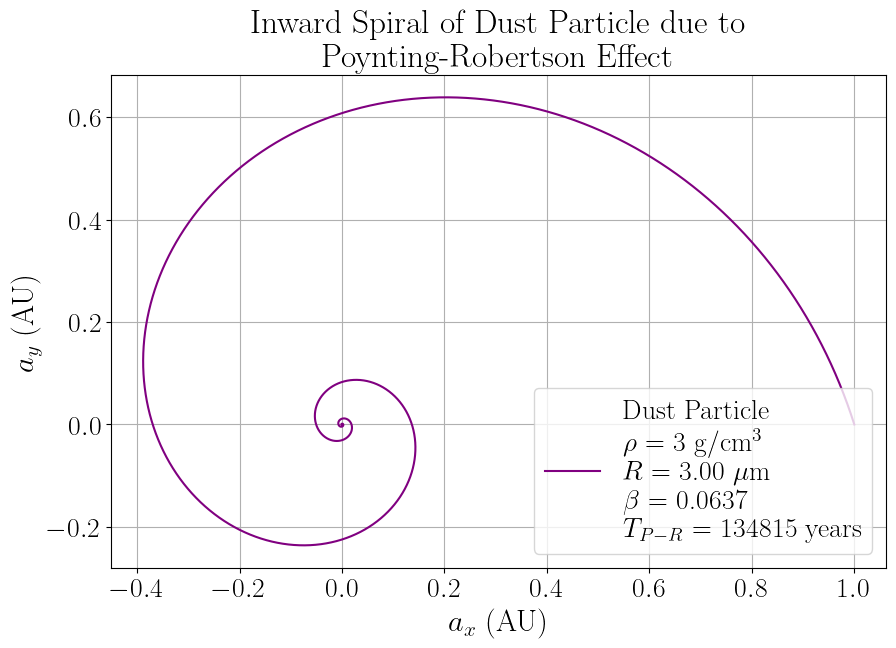

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L_sun = 3.828e26  # Solar luminosity in Watts
c = 3.0e8  # Speed of light in m/s
G = 6.67430e-11  # Gravitational constant in m^3/kg/s^2
M_sun = 1.989e30  # Solar mass in kg
R = 3e-6  # Radius of dust grain in meters
rho = 3 * 1e3  # Density of dust grain in kg/m^3
rho_a = 3  # Density of dust grain in g/cm^3

# Calculate beta
beta = (3 * L_sun) / (16 * np.pi * c * G * M_sun * R * rho)
print("Beta:", beta)

# Simulation parameters
initial_distance_au = 1.0  # Initial distance from the Sun in AU
time_years = np.linspace(0, 500000, 500000)  # Time in years, extended for more realistic fall time
angles = np.linspace(0, 20 * np.pi, 500000)  # Angle for spiral in radians

# Poynting-Robertson time calculation
distance_au = initial_distance_au * np.exp(-time_years / (1600 * (initial_distance_au**2) * (1 / beta)))

# Convert polar coordinates (r, theta) to Cartesian coordinates (x, y)
x = distance_au * np.cos(angles)
y = distance_au * np.sin(angles)

# Find the time when the grain falls into the Sun
fall_time_index = np.where(distance_au <= 0.00465047)[0]  # Distance less than 1 Solar radius in AU
if fall_time_index.size > 0:
    fall_time_years = time_years[fall_time_index[0]]
else:
    fall_time_years = np.nan

print(f"Time for the dust grain to fall into the Sun: {fall_time_years} years")

# Plotting
plt.figure(figsize=(10, 6.4))
plt.plot(x, y, color='purple', linewidth=1.5, label=f'Dust Particle\n$\\rho$ = {rho_a} g/cm$^3$\n$R$ = {R*1e6:.2f} $\\mu$m\n$\\beta$ = {beta:.4f}\n$T_{{P-R}}$ = {fall_time_years:.0f} years')
plt.xlabel(r'$a_x$ (AU)', fontsize=22)
plt.ylabel(r'$a_y$ (AU)', fontsize=22)
plt.title('Inward Spiral of Dust Particle due to \n Poynting-Robertson Effect')
plt.grid()
plt.legend()
plt.axis('equal')
plt.savefig('dust_spiral.pdf', format='pdf')
plt.show()


## Stellar Spectra Visualized
### Radiation laws

https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/bruzual-atlas

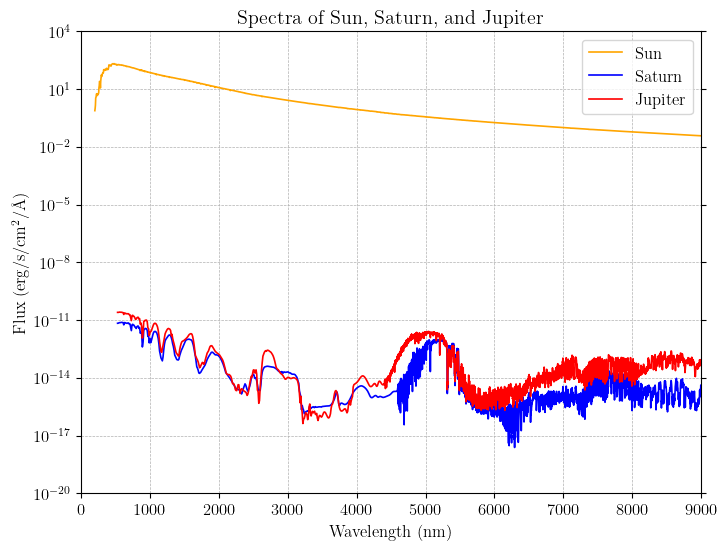

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Define file paths
sun_file = '/content/solar_spec.fits'
saturn_file = '/content/saturn_solsys_surfbright_001.fits'
jupiter_file = '/content/jupiter_solsys_surfbright_001.fits'

# Function to read data from a FITS file
def read_fits_data(fits_file):
    with fits.open(fits_file) as hdul:
        secondary_hdu = hdul[1]
        wavelength = secondary_hdu.data['WAVELENGTH']  # in Angstroms
        flux = secondary_hdu.data['FLUX']  # in Flam
    # Convert wavelength from Angstroms to nanometers
    wavelength_nm = wavelength * 0.1
    return wavelength_nm, flux

# Configure font and text settings
plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12
})

# Read data for each object
wavelength_sun, flux_sun = read_fits_data(sun_file)
wavelength_saturn, flux_saturn = read_fits_data(saturn_file)
wavelength_jupiter, flux_jupiter = read_fits_data(jupiter_file)

# Plotting
plt.figure(figsize=(8, 6))

# Plot each spectrum with distinct color and label
plt.plot(wavelength_sun, flux_sun, label='Sun', color='orange', linewidth=1.2)
plt.plot(wavelength_saturn, flux_saturn, label='Saturn', color='blue', linewidth=1.2)
plt.plot(wavelength_jupiter, flux_jupiter, label='Jupiter', color='red', linewidth=1.2)

# Labeling the plot
plt.xlabel(r'Wavelength (nm)')
plt.ylabel(r'Flux ($\rm erg/s/cm^2/\AA$)')
plt.title('Spectra of Sun, Saturn, and Jupiter')
plt.legend()

# Set the x-axis limits and configure the y-axis to a logarithmic scale
plt.xlim(0, 9000)
plt.yscale('log')
plt.ylim(1e-20, 1e4)  # Adjust this range based on your data

# Use a logarithmic scale with scientific notation on the y-axis
plt.tick_params(axis='y', which='both', right=True)
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


Sample Flux Values (W/m²/nm): [2.14521791e-89 4.58053722e-66 1.44578413e-51 1.05133386e-41
 1.41207305e-34 3.41392170e-29 5.44618112e-25 1.26931447e-21
 7.22188234e-19 1.41810810e-16]
Min Flux: 2.145217909411356e-89 Max Flux: 32462.579909447468


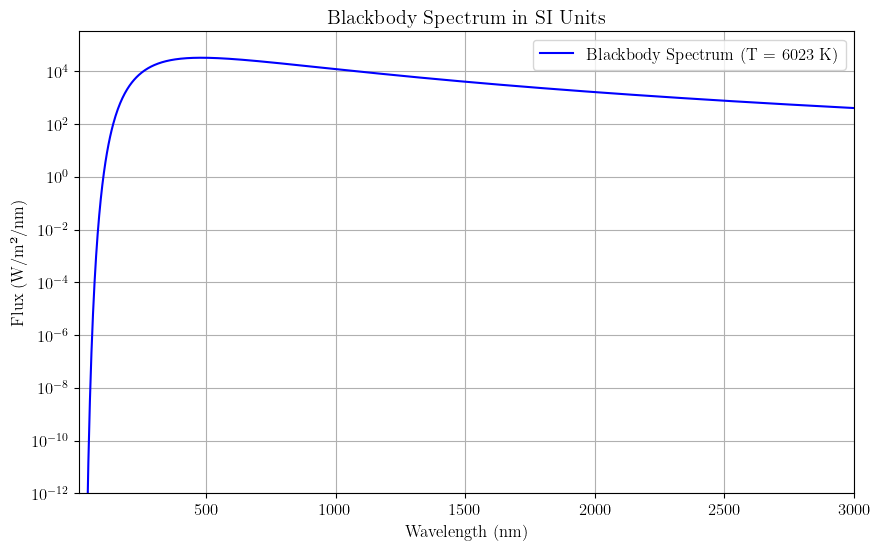

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const

# Planck's law for blackbody radiation in SI units (W/m²/nm)
def planck_flux_si(wavelength_nm, T):
    # Convert wavelength from nanometers to meters
    wavelength_m = wavelength_nm * 1e-9  # nm to meters

    # Calculate spectral radiance in SI units (W/m²/m)
    spectral_radiance = (2 * const.h * const.c**2) / (wavelength_m**5 * (np.exp(const.h * const.c / (wavelength_m * const.k * T)) - 1))

    # Convert to W/m²/nm by adjusting for wavelength units
    flux_si = spectral_radiance * 1e-9  # Convert W/m²/m to W/m²/nm
    return flux_si

# Wavelength range (in nm)
wavelength_nm = np.linspace(10, 3000, 1000)  # from 10 nm to 3000 nm

# Temperature in Kelvin
T = 6023

# Calculate blackbody spectrum in SI units (W/m²/nm)
flux_si = planck_flux_si(wavelength_nm, T)

# Debugging: Check the values of flux
print("Sample Flux Values (W/m²/nm):", flux_si[:10])  # Print the first 10 flux values


# Replace with the path to your FITS file
fits_file = '/content/solar_spec.fits'

# Open the FITS file
with fits.open(fits_file) as hdul:
    # Access the secondary HDU
    secondary_hdu = hdul[1]

    # Extract the wavelength and flux data
    wavelength = secondary_hdu.data['WAVELENGTH']  # in Angstroms
    flux = secondary_hdu.data['FLUX']  # in Flam (erg/s/cm²/Å)


# Plotting the blackbody spectrum
plt.figure(figsize=(10, 6))
plt.plot(wavelength_nm, flux_si, color='blue', label=f'Blackbody Spectrum (T = {T} K)')
plt.xlabel(r'Wavelength (nm)')  # Label in nanometers
plt.ylabel(r'Flux (W/m²/nm)')
plt.title('Blackbody Spectrum in SI Units')
plt.legend()

# Set y-axis to logarithmic scale
plt.yscale('log')

# Check the range of flux values for proper y-limits
print("Min Flux:", np.min(flux_si), "Max Flux:", np.max(flux_si))

# Format y-axis ticks in scientific notation
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'$10^{{{int(np.log10(x))}}}$' if x > 0 else ''))

# Set limits for better visibility
plt.xlim(10, 3000)  # Adjust x-axis limits as appropriate
plt.ylim(1e-12, np.max(flux_si) * 10)  # Set y-axis limits based on flux values

# Display the grid
plt.grid()
plt.show()


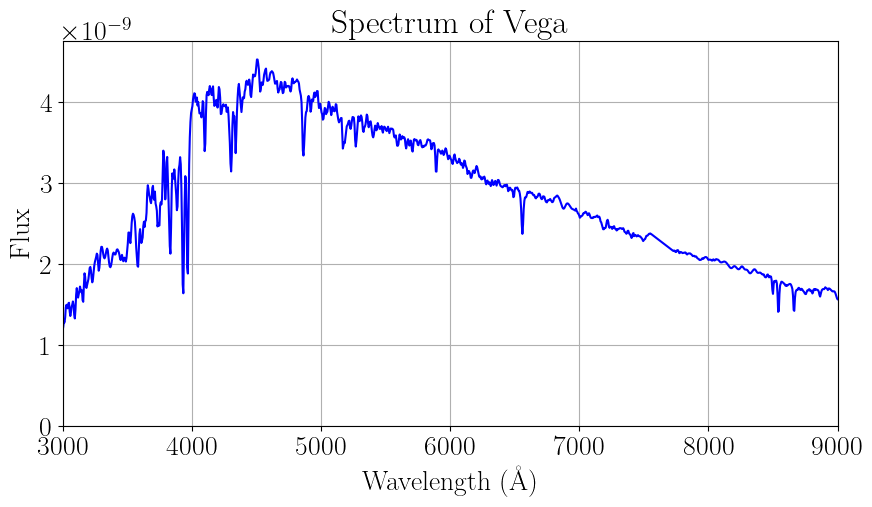

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Load the Vega spectrum from the FITS file
file_path = 'pickles_uk_19.fits'
with fits.open(file_path) as hdul:
    # Assuming the first HDU contains the data we need
    spectrum_data = hdul[1].data  # Adjust the index if needed
    # Extract the wavelength and flux data
    wavelength = spectrum_data['wavelength']  # Replace with actual column name
    flux = spectrum_data['flux']  # Replace with actual column name

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(wavelength, flux, color='blue')
plt.xlabel('Wavelength (Å)')
plt.xlim(3000,9000)
plt.ylabel('Flux')
plt.title('Spectrum of Vega')
plt.grid()
plt.ylim(bottom=0)  # Avoid negative flux values
plt.show()


Max Wavelength for Vega: 4505.00 Å
Max Wavelength for Solar: 4809.34 Å


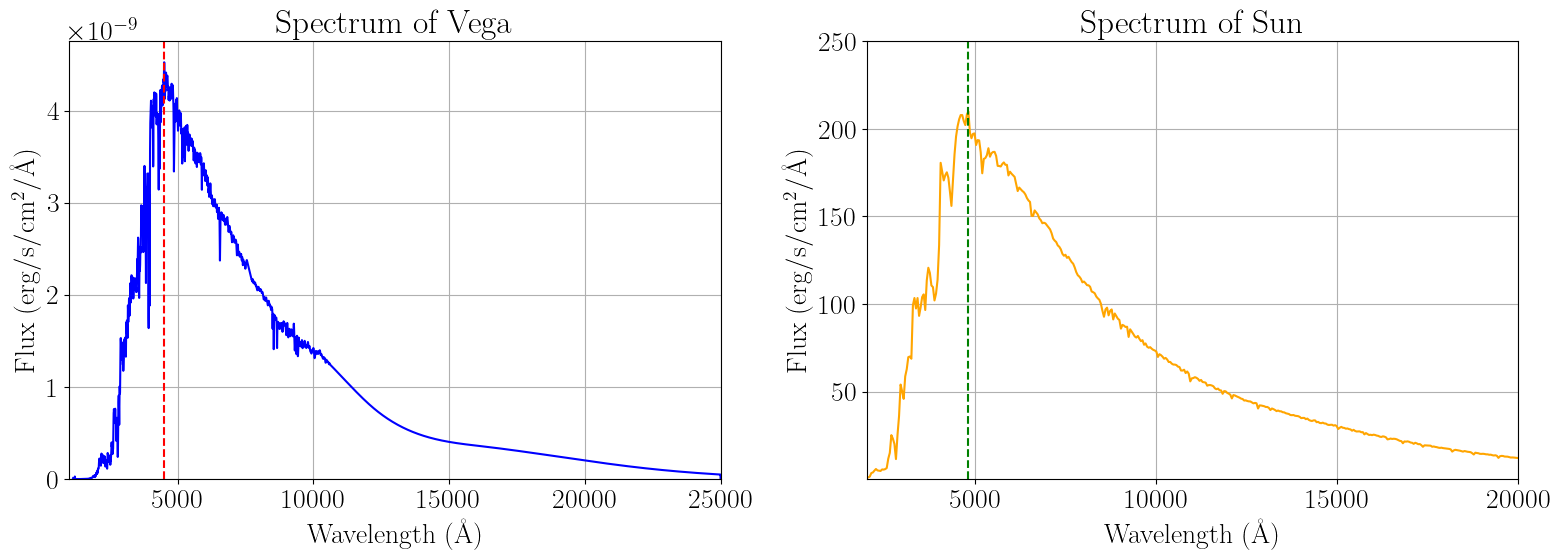

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Load Vega spectrum from the FITS file
vega_file_path = 'pickles_uk_19.fits'
with fits.open(vega_file_path) as hdul:
    vega_spectrum_data = hdul[1].data  # Adjust the index if needed
    vega_wavelength = vega_spectrum_data['wavelength']  # Replace with actual column name
    vega_flux = vega_spectrum_data['flux']  # Replace with actual column name

# Load Solar spectrum from the FITS file
solar_file_path = '/content/solar_spec.fits'
with fits.open(solar_file_path) as hdul:
    solar_spectrum_data = hdul[1]
    solar_wavelength = solar_spectrum_data.data['WAVELENGTH']  # in Angstroms
    solar_flux = solar_spectrum_data.data['FLUX']  # in Flam

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot Vega spectrum
ax1.plot(vega_wavelength, vega_flux, color='blue')
ax1.set_xlabel('Wavelength (Å)')
ax1.set_ylabel(r'Flux ($\rm erg/s/cm^2/\AA$)')  # Updated label for Vega
ax1.set_title('Spectrum of Vega')
ax1.set_xlim(1000, 25000)
ax1.grid()
ax1.set_ylim(bottom=0)  # Avoid negative flux values

# Calculate and plot the maximum wavelength for Vega
vega_max_wavelength = vega_wavelength[np.argmax(vega_flux)]
ax1.axvline(x=vega_max_wavelength, color='red', linestyle='--')
print(f'Max Wavelength for Vega: {vega_max_wavelength:.2f} Å')

# Plot Solar spectrum in Angstroms
ax2.plot(solar_wavelength, solar_flux, color='orange')
ax2.set_xlabel('Wavelength (Å)')
ax2.set_ylabel(r'Flux ($\rm erg/s/cm^2/\AA$)')  # Matching label for Solar spectrum
ax2.set_title('Spectrum of Sun')
ax2.set_ylim(min(solar_flux), 2.50e+2)  # Set y-axis limits
ax2.set_xlim(2000, 20000)  # Set x-axis limits
ax2.grid()

# Calculate and plot the maximum wavelength for Solar
solar_max_wavelength = solar_wavelength[np.argmax(solar_flux)]
ax2.axvline(x=solar_max_wavelength, color='green', linestyle='--')
print(f'Max Wavelength for Solar: {solar_max_wavelength:.2f} Å')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


Lambda max (nm): 480.93398440000004
Temperature (K): 6023.70


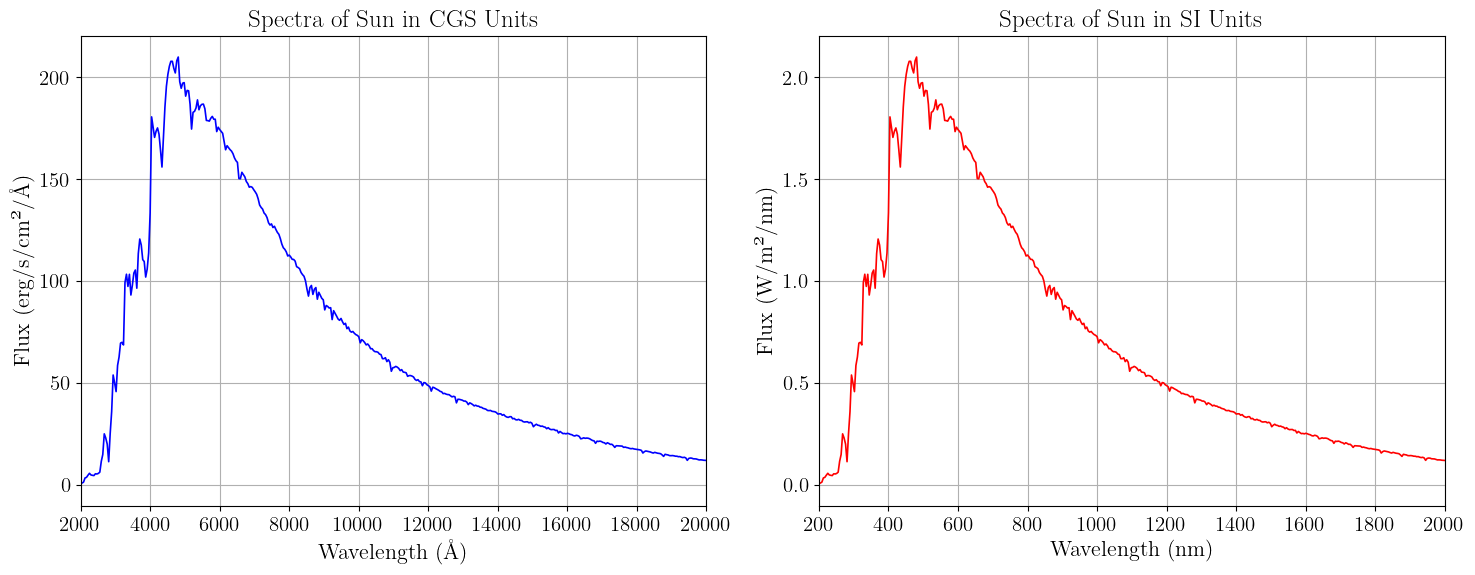

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Replace with the path to your FITS file
fits_file = '/content/solar_spec.fits'

# Open the FITS file
with fits.open(fits_file) as hdul:
    # Access the secondary HDU
    secondary_hdu = hdul[1]

    # Extract the wavelength and flux data
    wavelength = secondary_hdu.data['WAVELENGTH']  # in Angstroms (Å)
    flux = secondary_hdu.data['FLUX']  # in Flam (erg/s/cm²/Å)

# Configure font and text settings without LaTeX
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 15
})

# Convert wavelength from Angstroms to nanometers
wavelength_nm = wavelength * 0.1  # Å to nm

# Convert flux from cgs units (erg/s/cm²/Å) to SI units (W/m²/nm)
flux_si = flux * 1e-2   # Convert to W/m²/nm

# Find lambda_max and the corresponding max flux in the SI units
lambda_max = wavelength_nm[np.argmax(flux_si)]
max_flux = np.max(flux_si)

# Calculate temperature using Wien's Law
wien_constant = 2.897e6  # nm*K
temperature = wien_constant / lambda_max

print(f"Lambda max (nm): {lambda_max}")
print(f"Temperature (K): {temperature:.2f}")

# Create a figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Left plot: Original data in cgs units
ax1.plot(wavelength, flux, color='blue', linewidth=1.2)
ax1.set_xlabel('Wavelength (Å)', fontsize=16)
ax1.set_ylabel('Flux (erg/s/cm²/Å)', fontsize=16)
ax1.set_title('Spectra of Sun in CGS Units')
ax1.grid()

# Right plot: Converted data in SI units
ax2.plot(wavelength_nm, flux_si, color='red', linewidth=1.2)
ax2.set_xlabel('Wavelength (nm)', fontsize=16)
ax2.set_ylabel('Flux (W/m²/nm)', fontsize=16)
ax2.set_title('Spectra of Sun in SI Units')

# Mark lambda max on the right plot
#ax2.axvline(lambda_max, color='blue', linestyle='--', label=f'λ_max = {lambda_max:.1f} nm')
#ax2.legend()

# Set the x-axis limits for the right plot to focus on visible and near-infrared (200 to 2000 nm)
ax1.set_xlim(2000, 20000)
ax2.set_xlim(200, 2000)

# Display the grid
ax2.grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('solar_specunits.pdf', format='pdf')
plt.show()


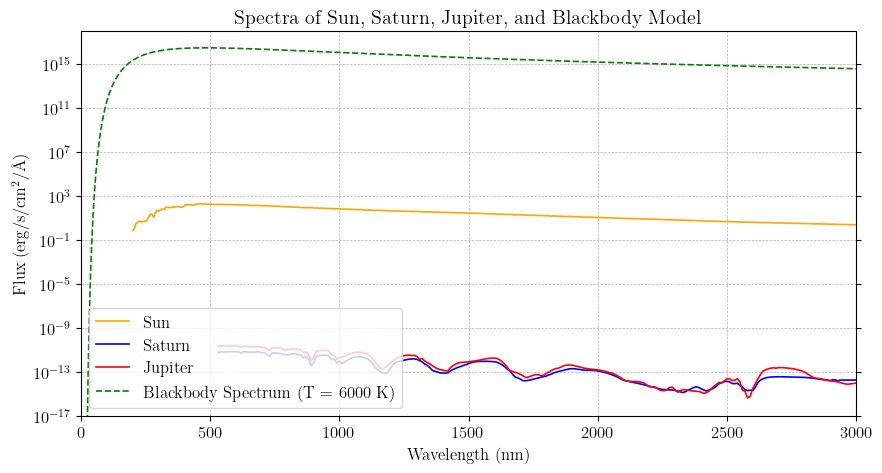

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import scipy.constants as const

# Function to read data from a FITS file
def read_fits_data(fits_file):
    with fits.open(fits_file) as hdul:
        secondary_hdu = hdul[1]
        wavelength = secondary_hdu.data['WAVELENGTH']  # in Angstroms
        flux = secondary_hdu.data['FLUX']  # in Flam
    # Convert wavelength from Angstroms to nanometers
    wavelength_nm = wavelength * 0.1
    return wavelength_nm, flux

# Planck's law for blackbody radiation with flux in cgs units
def planck_flux(wavelength_nm, T):
    # Convert wavelength from nanometers to meters
    wavelength_m = wavelength_nm * 1e-9  # nm to meters

    # Calculate spectral radiance in SI units (W/m^2/m)
    spectral_radiance = (2 * const.h * const.c**2) / (wavelength_m**5 * (np.exp(const.h * const.c / (wavelength_m * const.k * T)) - 1))

    # Convert from SI units to cgs units (erg/s/cm^2/Å)
    flux_flam = spectral_radiance * 1e3  # 1 W/m^2/m = 1e3 erg/s/cm^2/Å
    return flux_flam

# Define file paths
sun_file = '/content/solar_spec.fits'
saturn_file = '/content/saturn_solsys_surfbright_001.fits'
jupiter_file = '/content/jupiter_solsys_surfbright_001.fits'

# Configure font and text settings
plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12
})

# Read data for each object
wavelength_sun, flux_sun = read_fits_data(sun_file)
wavelength_saturn, flux_saturn = read_fits_data(saturn_file)
wavelength_jupiter, flux_jupiter = read_fits_data(jupiter_file)

# Wavelength range for blackbody spectrum (in nm)
wavelength_blackbody = np.linspace(10, 3000, 1000)  # from 10 nm to 3000 nm
# Temperature for blackbody spectrum
T = 6000

# Calculate blackbody spectrum in Flam
flux_blackbody = planck_flux(wavelength_blackbody, T)

# Plotting
plt.figure(figsize=(10, 5))

# Plot each astronomical spectrum
plt.plot(wavelength_sun, flux_sun, label='Sun', color='orange', linewidth=1.2)
plt.plot(wavelength_saturn, flux_saturn, label='Saturn', color='blue', linewidth=1.2)
plt.plot(wavelength_jupiter, flux_jupiter, label='Jupiter', color='red', linewidth=1.2)

# Plot the blackbody model spectrum
plt.plot(wavelength_blackbody, flux_blackbody, label=f'Blackbody Spectrum (T = {T} K)', color='green', linestyle='--', linewidth=1.2)

# Labeling the plot
plt.xlabel(r'Wavelength (nm)')
plt.ylabel(r'Flux ($\rm erg/s/cm^2/\AA$)')
plt.title('Spectra of Sun, Saturn, Jupiter, and Blackbody Model')
plt.legend()

# Set the x-axis limits and configure the y-axis to a logarithmic scale
plt.xlim(0, 3000)  # Adjust to include relevant data
plt.yscale('log')
plt.ylim(1e-17, 1e18)  # Adjust based on your data

# Use a logarithmic scale with scientific notation on the y-axis
plt.tick_params(axis='y', which='both', right=True)
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Show the plot
plt.show()


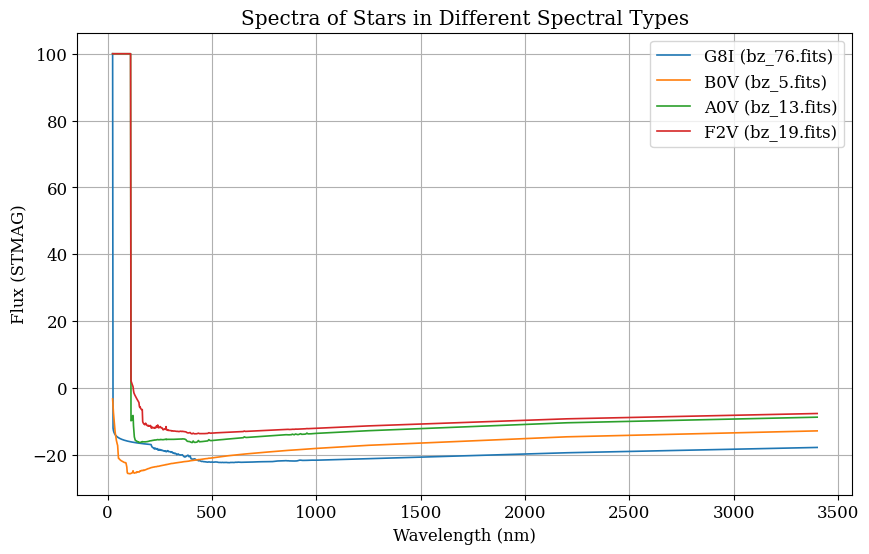

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# List of FITS files and corresponding star types
fits_files = {
    'bz_76.fits': 'G8I',
    'bz_5.fits': 'B0V',
    'bz_13.fits': 'A0V',
    'bz_19.fits': 'F2V'
}

# Configure font and text settings without LaTeX
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12
})

# Set up the plot
plt.figure(figsize=(10, 6))

# Loop over each FITS file and plot the spectrum
for fits_file, star_type in fits_files.items():
    # Open the FITS file
    with fits.open(fits_file) as hdul:
        # Access the binary table HDU (where spectrum data is stored)
        table_hdu = hdul[1]

        # Extract wavelength and flux in the original cgs units (STMAG)
        wavelength = table_hdu.data['WAVELENGTH']  # Already in Angstroms
        flux = table_hdu.data['FLUX']  # In STMAG (cgs units)

    # Convert wavelength from Angstroms to nanometers for plotting
    wavelength_nm = wavelength * 0.1

    # Plot each star's spectrum
    plt.plot(wavelength_nm, flux, label=f"{star_type} ({fits_file})", linewidth=1.2)

# Labeling and configuration
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (STMAG)')
plt.title('Spectra of Stars in Different Spectral Types')
  # Set x-axis limits for visible range and near-infrared
plt.legend()
plt.grid()
plt.show()


In [ ]:

# Replace with the path to your FITS file
fits_file = '/content/pn_spectrum_100k_normal.fits'

# Open the FITS file
with fits.open(fits_file) as hdul:
    # Access the secondary HDU
    secondary_hdu = hdul[1]

    # Extract the wavelength and flux data
    wavelength = secondary_hdu.data['WAVELENGTH']  # in Angstroms
    flux = secondary_hdu.data['FLUX']  # in Flam

# Convert wavelength from Angstroms to nanometers
#wavelength_nm = wavelength * 0.1  # Convert to nanometers

# Find the maximum value of flux and its corresponding wavelength
max_flux = np.max(flux)
max_flux_index = np.argmax(flux)
max_flux_wavelength = wavelength[max_flux_index]

# Print the results
print(f'Maximum Flux: {max_flux} Flam at Wavelength: {max_flux_wavelength} nm')


# Create an interactive plot using Plotly
fig = go.Figure()

# Add the spectra line
fig.add_trace(go.Scatter(x=wavelength, y=flux, mode='lines', name='Spectra'))

# Highlight the maximum flux point
fig.add_trace(go.Scatter(x=[max_flux_wavelength], y=[max_flux], mode='markers',
                         marker=dict(color='red', size=10), name='Max Flux'))

# Customize layout
fig.update_layout(
    #title='Interactive Spectra of Sun',
    xaxis_title='Wavelength (A)',  # Changed to nm
    yaxis_title='Flux (Flam)',
    #xaxis_range=[400, 1200],  # Optional initial x-axis range (for nanometers)
    yaxis_tickformat='.2e',  # Use scientific notation with 2 decimal places
)

# Show the interactive plot
fig.show()


Maximum Flux: 2.136639772e-12 Flam at Wavelength: 5006.964312 nm


In [ ]:
import numpy as np
import plotly.graph_objects as go
from astropy.io import fits

# Replace with the path to your FITS file
fits_file = '/content/jupiter_solsys_surfbright_001.fits'

# Open the FITS file
with fits.open(fits_file) as hdul:
    # Access the secondary HDU
    secondary_hdu = hdul[1]

    # Extract the wavelength and flux data
    wavelength = secondary_hdu.data['WAVELENGTH']  # in Angstroms
    flux = secondary_hdu.data['FLUX']  # in Flam

# Convert wavelength from Angstroms to nanometers
wavelength_nm = wavelength * 0.1  # Convert to nanometers

# Find the maximum value of flux and its corresponding wavelength
max_flux = np.max(flux)
max_flux_index = np.argmax(flux)
max_flux_wavelength = wavelength_nm[max_flux_index]

# Print the results
print(f'Maximum Flux: {max_flux} Flam at Wavelength: {max_flux_wavelength} nm')


# Create an interactive plot using Plotly
fig = go.Figure()

# Add the spectra line
fig.add_trace(go.Scatter(x=wavelength_nm, y=flux, mode='lines', name='Spectra'))

# Highlight the maximum flux point
fig.add_trace(go.Scatter(x=[max_flux_wavelength], y=[max_flux], mode='markers',
                         marker=dict(color='red', size=10), name='Max Flux'))

# Customize layout
fig.update_layout(
    title='Interactive Spectra of Sun',
    xaxis_title='Wavelength (nm)',  # Changed to nm
    yaxis_title='Flux (Flam)',
    #xaxis_range=[400, 1200],  # Optional initial x-axis range (for nanometers)
    yaxis_tickformat='.2e',  # Use scientific notation with 2 decimal places
)

# Show the interactive plot
fig.show()


Maximum Flux: 2.6131653374136284e-11 Flam at Wavelength: 560.0000000000001 nm


In [ ]:
import numpy as np
import plotly.graph_objects as go
from astropy.io import fits

# Replace with the path to your FITS file
fits_file = '/content/solar_spec.fits'

# Open the FITS file
with fits.open(fits_file) as hdul:
    # Access the secondary HDU
    secondary_hdu = hdul[1]

    # Extract the wavelength and flux data
    wavelength = secondary_hdu.data['WAVELENGTH']  # in Angstroms
    flux = secondary_hdu.data['FLUX']  # in Flam

# Convert wavelength from Angstroms to nanometers
wavelength_nm = wavelength * 0.1  # Convert to nanometers

# Find the maximum value of flux and its corresponding wavelength
max_flux = np.max(flux)
max_flux_index = np.argmax(flux)
max_flux_wavelength = wavelength_nm[max_flux_index]

# Print the results
print(f'Maximum Flux: {max_flux} Flam at Wavelength: {max_flux_wavelength} nm')


# Create an interactive plot using Plotly
fig = go.Figure()

# Add the spectra line
fig.add_trace(go.Scatter(x=wavelength_nm, y=flux, mode='lines', name='Spectra'))

# Highlight the maximum flux point
fig.add_trace(go.Scatter(x=[max_flux_wavelength], y=[max_flux], mode='markers',
                         marker=dict(color='red', size=10), name='Max Flux'))

# Customize layout
fig.update_layout(
    title='Interactive Spectra of Sun',
    xaxis_title='Wavelength (nm)',  # Changed to nm
    yaxis_title='Flux (Flam)',
    #xaxis_range=[400, 1200],  # Optional initial x-axis range (for nanometers)
    yaxis_tickformat='.2e',  # Use scientific notation with 2 decimal places
)

# Show the interactive plot
fig.show()


Maximum Flux: 210.01771155294716 Flam at Wavelength: 480.93398440000004 nm


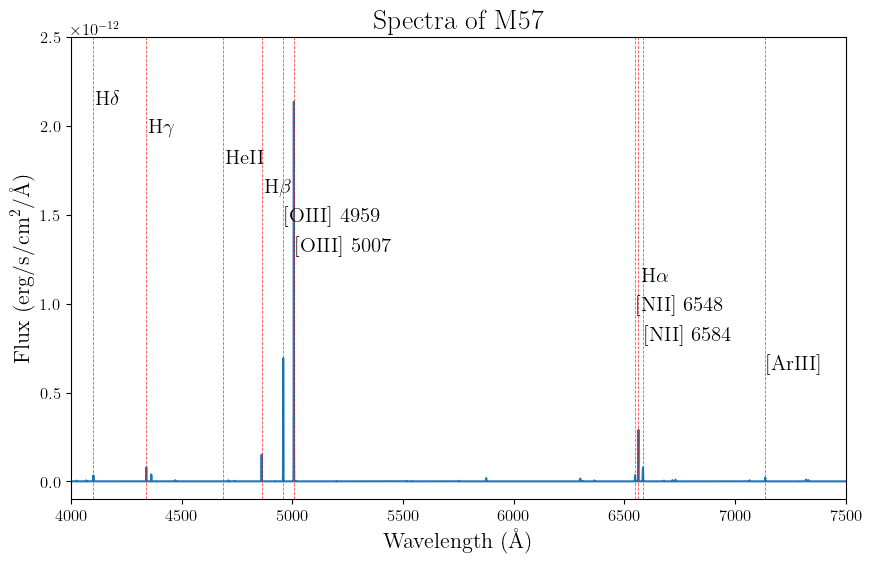

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Replace with the path to your FITS file
fits_file = '/content/pn_spectrum_100k_normal.fits'

# Open the FITS file
with fits.open(fits_file) as hdul:
    # Access the secondary HDU
    secondary_hdu = hdul[1]

    # Extract the wavelength and flux data
    wavelength = secondary_hdu.data['WAVELENGTH']  # in Angstroms
    flux = secondary_hdu.data['FLUX']  # in Flam


# Define the wavelengths of key spectral lines (in Angstroms), using unique keys
spectral_lines = {
    r'H$\delta$': 4101,
    r'H$\gamma$': 4340,
    'HeII': 4686,
    r'H$\beta$': 4861,
    '[OIII] 4959': 4959,  # [O III] line at 4959 Å
    '[OIII] 5007': 5007,  # [O III] line at 5007 Å
    r'H$\alpha$': 6563,
    '[NII] 6548': 6548,   # [N II] line at 6548 Å
    '[NII] 6584': 6584,   # [N II] line at 6584 Å
    '[ArIII]': 7136
}

# Plotting the spectra
plt.figure(figsize=(10, 6))
plt.plot(wavelength, flux, label='Spectra')

# Define heights for the labels, descending from the top to avoid overlap

plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12
})
num_lines = len(spectral_lines)
max_height = 2.1e-12  # Maximum height for the labels
min_height = 0.6e-12  # Minimum height for the labels
heights = np.linspace(max_height, min_height, num_lines)  # Evenly spaced heights

# Plot vertical lines and labels for the spectral lines
for i, (line, wav) in enumerate(spectral_lines.items()):
    plt.axvline(x=wav, color='r', linestyle='--', alpha=0.7, linewidth=0.6)  # Thinner lines
    plt.text(wav + 10, heights[i], line, rotation=0, verticalalignment='bottom', fontsize=15)

plt.xlabel(r'Wavelength ($\rm \AA$)', fontsize=16)
plt.ylabel(r'Flux ($\rm erg/s/cm^2/\AA$)', fontsize=16)
plt.title('Spectra of M57', fontsize=20)

# Set the y-axis limits from min(flux) to 2.5e-12
plt.ylim(-0.1e-12, 2.5e-12)

# Set the x-axis limits to focus on the range between 4000 and 7500 Å
plt.xlim(4000, 7500)

# Display the grid
#plt.grid()

# Save the plot as a PDF
plt.savefig('m57.pdf', format='pdf')

# Show the plot
plt.show()


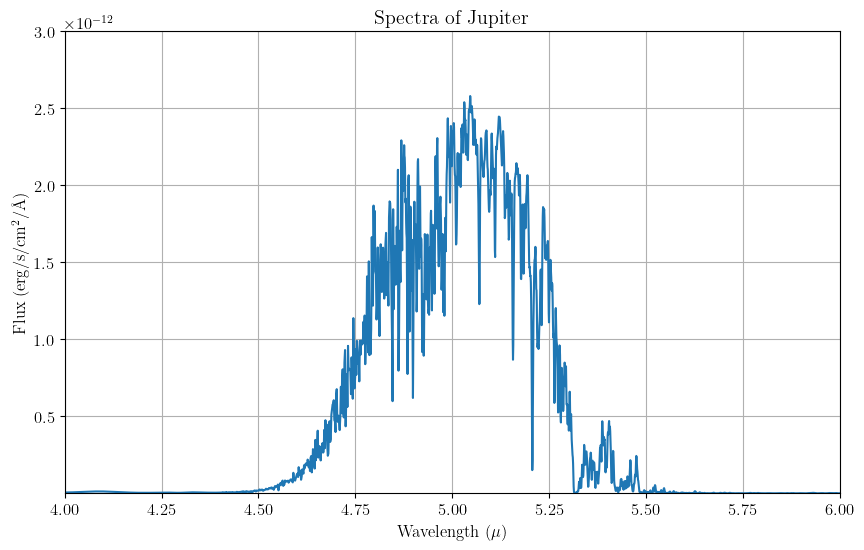

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Replace with the path to your FITS file
fits_file = '/content/jupiter_solsys_surfbright_001.fits'

# Open the FITS file
with fits.open(fits_file) as hdul:
    # Access the secondary HDU
    secondary_hdu = hdul[1]

    # Extract the wavelength and flux data
    wavelength = secondary_hdu.data['WAVELENGTH']  # in Angstroms
    flux = secondary_hdu.data['FLUX']  # in Flam

# Convert wavelength from Angstroms to microns
wavelength_microns = wavelength * 1e-4  # Convert to microns

# Plotting the spectra
plt.figure(figsize=(10, 6))
plt.plot(wavelength_microns, flux)
plt.xlabel(r'Wavelength ($\mu$)')
plt.ylabel(r'Flux ($\rm erg/s/cm^2/\AA$)')
plt.title('Spectra of Jupiter')

# Set the y-axis limits from min(flux) to 3.00e-12
plt.ylim(min(flux), 3.00e-12)

# Set the x-axis limits to focus on the range between 4 and 12 microns
plt.xlim(4, 6)

# Display the grid
plt.grid()

# Show the plot
plt.show()


## Planetary Temperature Distribution Visualized
### Radiation Mechanics

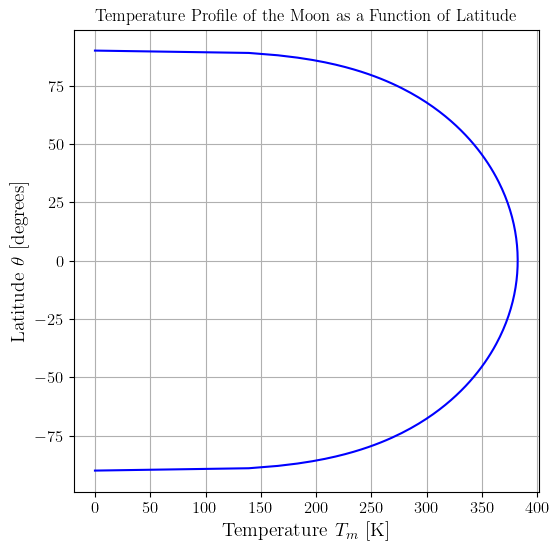

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
A_b = 0.11  # Albedo
epsilon = 1  # Emissivity
L_sun = 3.828e26  # Luminosity of the Sun in W
sigma = 5.670374419e-8  # Stefan-Boltzmann constant in W/m^2/K^4
a = 1.496e11  # Distance from Sun to Moon (1 AU) in meters

# Calculate the constant term
constant_term = ((1 - A_b) / epsilon * L_sun / (4 * np.pi * sigma * a**2))**(1 / 4)

# Latitude array from -90 (South Pole) to +90 (North Pole)
theta_degrees = np.linspace(-90, 90, 180)
theta_radians = np.radians(theta_degrees)

# Configure font and text settings
plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12
})


# Temperature calculation
T_m = constant_term * np.cos(theta_radians)**(1 / 4)

# Plotting with inverted axes
plt.figure(figsize=(6, 6))
plt.plot(T_m, theta_degrees, color='blue', linewidth=1.5)
plt.xlabel(r'Temperature $T_m$ [K]', fontsize=14)
plt.ylabel(r'Latitude $\theta$ [degrees]', fontsize=14)
plt.title('Temperature Profile of the Moon as a Function of Latitude', fontsize=12)
plt.grid()

# Display the plot
plt.show()


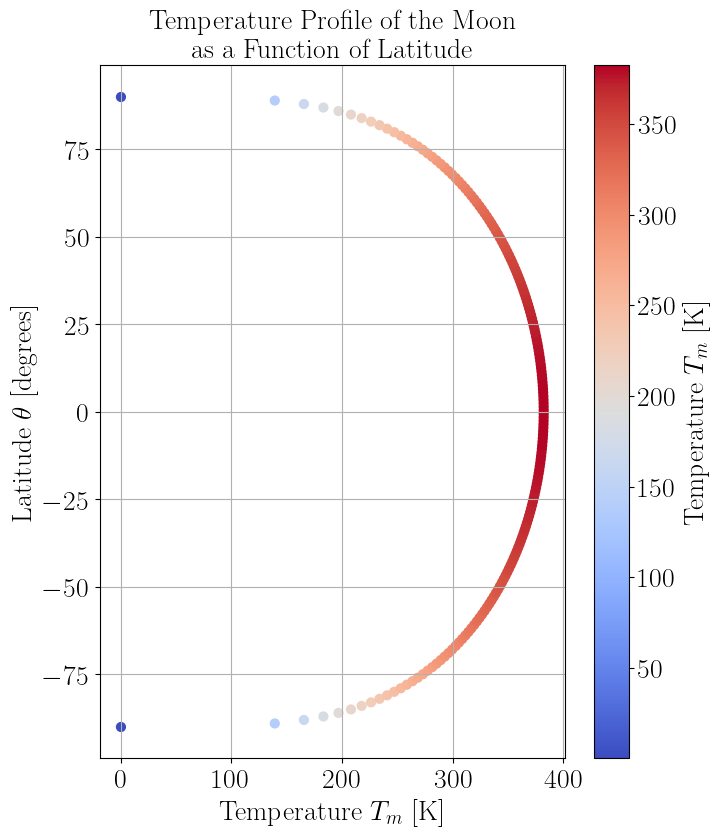

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
A_b = 0.11  # Albedo
epsilon = 1  # Emissivity
L_sun = 3.828e26  # Luminosity of the Sun in W
sigma = 5.670374419e-8  # Stefan-Boltzmann constant in W/m^2/K^4
a = 1.496e11  # Distance from Sun to Moon (1 AU) in meters

# Calculate the constant term
constant_term = ((1 - A_b) / epsilon * L_sun / (4 * np.pi * sigma * a**2))**(1 / 4)

# Latitude array from -90 (South Pole) to +90 (North Pole)
theta_degrees = np.linspace(-90, 90, 180)
theta_radians = np.radians(theta_degrees)

# Configure font and text settings
plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 20
})

# Temperature calculation
T_m = constant_term * np.cos(theta_radians)**(1 / 4)

# Plotting with a color bar
plt.figure(figsize=(7.5, 9))
scatter = plt.scatter(T_m, theta_degrees, c=T_m, cmap='coolwarm', s=40)  # No edge color for dots
plt.colorbar(scatter, label=r'Temperature $T_m$ [K]')  # Add color bar
plt.xlabel(r'Temperature $T_m$ [K]', fontsize=20)
plt.ylabel(r'Latitude $\theta$ [degrees]', fontsize=20)
plt.title('Temperature Profile of the Moon \n as a Function of Latitude', fontsize=20)
plt.grid()

# Display the plot
plt.savefig('moon_temp.pdf', format='pdf')
plt.show()


## Epicyclic Model Visualized
### Positional Astronomy

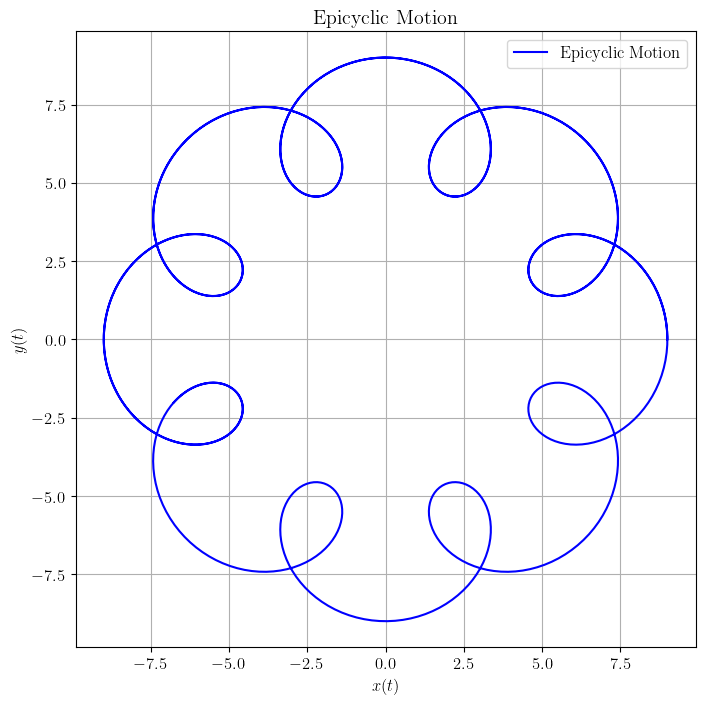

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
R = 7 # Radius of the deferent
r = 2 # Radius of the epicycle
psi = 9  # Angular velocity of the deferent
omega =  1 # Angular velocity of the epicycle

# Time variable
t = np.linspace(0, 10, 1000)  # Time range for the plot

# Parametric equations for x and y
x = R * np.cos(omega * t) + r * np.cos(psi * t)
y = R * np.sin(omega * t) + r * np.sin(psi * t)

# Plot the epicyclic motion
# Creating the histogram
plt.figure(figsize=(8, 8))

plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12
})
plt.plot(x, y, label='Epicyclic Motion', color='b')

# Labeling the axes
plt.title('Epicyclic Motion')
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$y(t)$')
plt.grid(True)
plt.axis('equal')  # Equal scaling on both axes
plt.legend()

# Show the plot
plt.show()


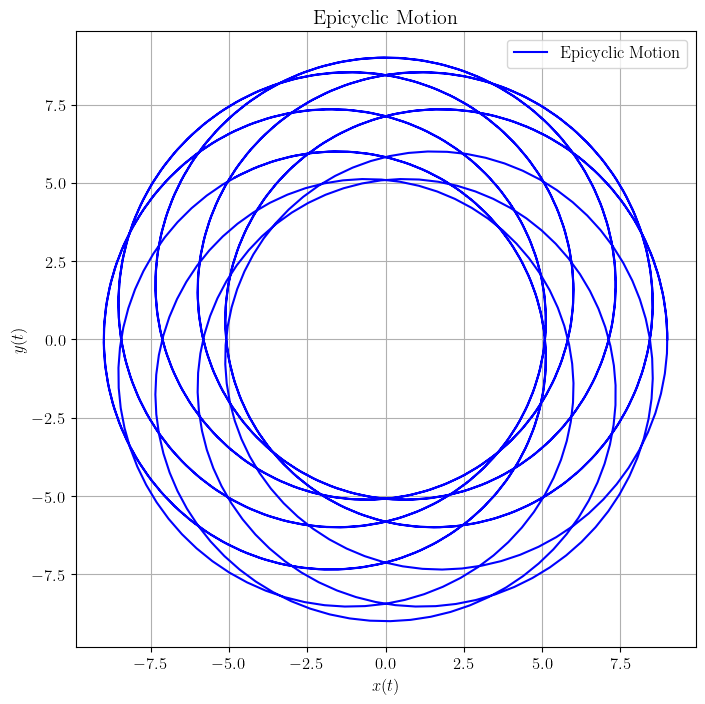

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
R = 7 # Radius of the deferent
r = 2 # Radius of the epicycle
psi = 1  # Angular velocity of the deferent
omega =  9 # Angular velocity of the epicycle

# Time variable
t = np.linspace(0, 10, 1000)  # Time range for the plot

# Parametric equations for x and y
x = R * np.cos(omega * t) + r * np.cos(psi * t)
y = R * np.sin(omega * t) + r * np.sin(psi * t)

# Plot the epicyclic motion
# Creating the histogram
plt.figure(figsize=(8, 8))

plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12
})
plt.plot(x, y, label='Epicyclic Motion', color='b')

# Labeling the axes
plt.title('Epicyclic Motion')
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$y(t)$')
plt.grid(True)
plt.axis('equal')  # Equal scaling on both axes
plt.legend()

# Show the plot
plt.show()


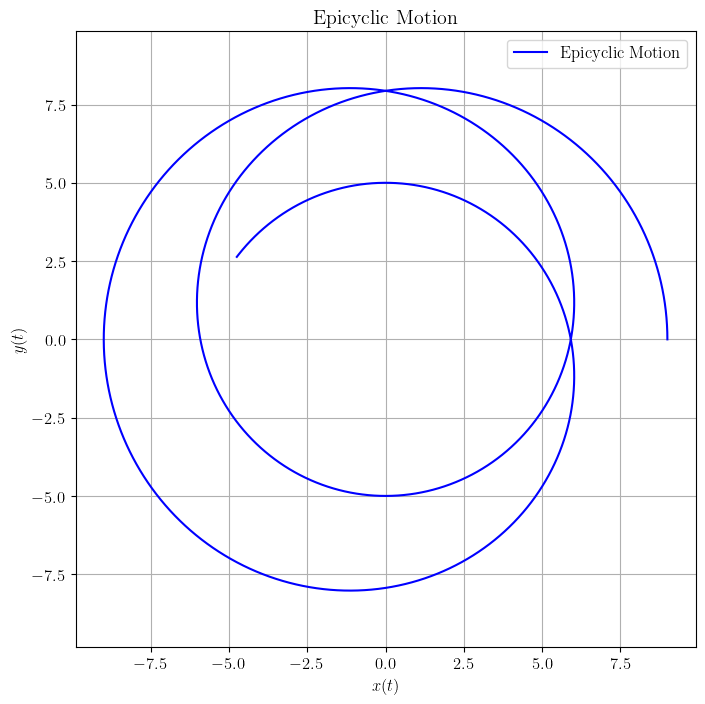

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
R = 7 # Radius of the deferent
r = 2 # Radius of the epicycle
psi = 0.5  # Angular velocity of the deferent
omega =  1.5 # Angular velocity of the epicycle

# Time variable
t = np.linspace(0, 10, 1000)  # Time range for the plot

# Parametric equations for x and y
x = R * np.cos(omega * t) + r * np.cos(psi * t)
y = R * np.sin(omega * t) + r * np.sin(psi * t)

# Plot the epicyclic motion
# Creating the histogram
plt.figure(figsize=(8, 8))

plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12
})
plt.plot(x, y, label='Epicyclic Motion', color='b')

# Labeling the axes
plt.title('Epicyclic Motion')
plt.xlabel(r'$x(t)$')
plt.ylabel(r'$y(t)$')
plt.grid(True)
plt.axis('equal')  # Equal scaling on both axes
plt.legend()

# Show the plot
plt.show()


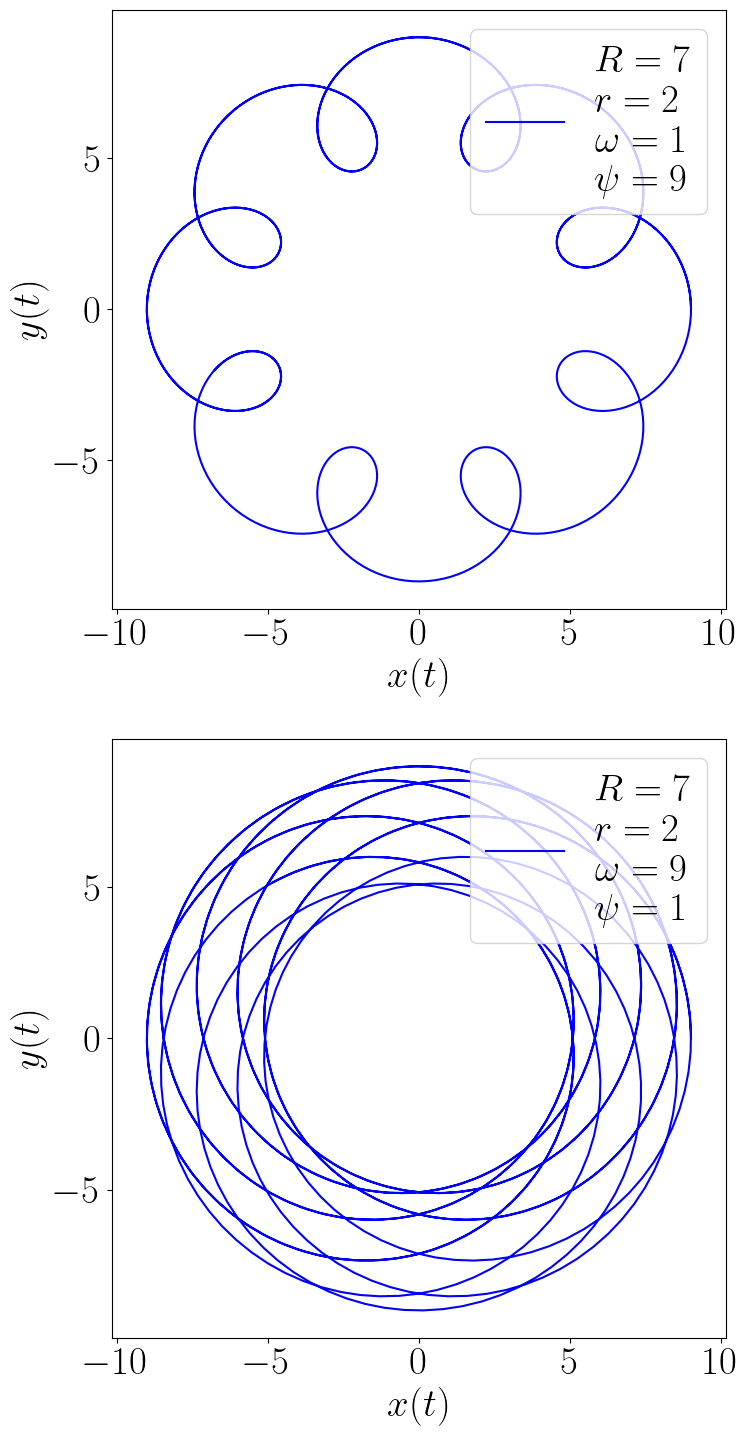

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
R = 7  # Radius of the deferent
r = 2  # Radius of the epicycle

# Time variable
t = np.linspace(0, 10, 1000)  # Time range for the plot

# Create a list of (omega, psi) pairs
params = [(1, 9), (9, 1)] #, (1.5, 0.5)

# Initialize the figure
plt.figure(figsize=(8, 15))

plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 28
})

# Loop over the parameters and generate each plot
for i, (omega, psi) in enumerate(params, 1):
    # Parametric equations for x and y
    x = R * np.cos(omega * t) + r * np.cos(psi * t)
    y = R * np.sin(omega * t) + r * np.sin(psi * t)

    # Subplot for each (omega, psi) pair
    plt.subplot(2, 1, i)
    plt.plot(x, y, label=f'$R=7$\n$r=2$\n$\omega={omega}$\n$\psi={psi}$', color='b')


    # Labeling the axes
    #plt.title(f'Epicyclic Motion for , psi={psi}')
    plt.xlabel(r'$x(t)$')
    plt.ylabel(r'$y(t)$')
    #plt.grid(True)
    plt.axis('equal')  # Equal scaling on both axes
    plt.legend(loc='upper right')  # Position legend in the upper right corner

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig('epicyclic_motion.pdf', format='pdf')  # Save the figure as a PDF
plt.show()
